# Week 3
## 1. Data AUC.csv

In [585]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from feature_engine.encoding import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from feature_engine.encoding import (
    OneHotEncoder,
    CountFrequencyEncoder,
    MeanEncoder,
    OrdinalEncoder,
    WoEEncoder,
)

In [586]:
df_auc = pd.read_csv('dataset/AUC.csv')
df_auc.head(15)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [587]:
def check_data(df):
    print(f"There are {df.isna().sum().sum()} missing values in the dataset.")
    print(f"There are {df.duplicated().sum()} duplicated values in the dataset.")

check_data(df_auc)

There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.


**TODO**:
- Fixing & Removing unnecessary format:
    - Removing:
        - "Writtenby:" in `author` column.
        - "Narratedby:" in `narrator` column.
    - Fixing:
        - Add space between two or more word blocks in `author` and `narrator` columns.
- Turn `Time` column into a minute of duration instead
- Convert some column with corrected data type:
    - Turn `Time` column into a minute of duration instead.
    - Turn `price` column into float instead.
- Turn `release-date` into a pandas datetime format.
- Fix `stars` column by:
    - Adding a new column called `rating` containing how many ratings are there.
    - Fix the stars rating format.

1. Fixing & Removing unnecessary format:


In [588]:
# Removing:
# - "Writtenby:" in `author` column
# - "Narratedby:" in `narrator` column

df_auc['author'] = df_auc['author'].str.replace('Writtenby:', '', regex=False)
df_auc['narrator'] = df_auc['narrator'].str.replace('Narratedby:', '', regex=False)

df_auc.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [589]:
# Fixing:
# - Add space between two or more word blocks in `author` and `narrator` columns
df_auc['author'] = df_auc['author'].str.replace(pat = r"(\w)([A-Z])", repl = r"\1 \2", regex = True)
df_auc['narrator'] = df_auc['narrator'].str.replace(pat = r"(\w)([A-Z])", repl = r"\1 \2", regex = True)

df_auc.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,Robbie Daymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,Dan Russell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [590]:
df_auc = pd.concat([df_auc['name'], 
                            #splits author into author1, author2 and author3.
                            df_auc['author'].str.split(',', expand = True).add_prefix('author'),
                            df_auc.loc[:,['narrator', 'time', 'releasedate', 'language', 'stars', 'price']]], 
                            axis = 1)

# adding "None" to author 1, 2, 3 if there's no author (missing values)
df_auc[['author1', 'author2', 'author3']] = df_auc[['author1', 'author2', 'author3']].fillna('No Author')

df_auc.head()

,name,author0,author1,author2,author3,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,No Author,Bill Lobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,No Author,No Author,No Author,Robbie Daymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,No Author,No Author,No Author,Dan Russell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Rick Riordan,No Author,No Author,No Author,Soneela Nankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,No Author,No Author,No Author,Jesse Bernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [591]:
df_auc.sample(5, random_state=6)

,name,author0,author1,author2,author3,narrator,time,releasedate,language,stars,price
8407,Night of the New Magicians,Mary Pope Osborne,No Author,No Author,No Author,Mary Pope Osborne,1 hr and 17 mins,13-03-06,English,5 out of 5 stars1 rating,301.00
11786,Is Everyone Really Equal?,Özlem Sensoy,Robin Di Angelo,No Author,No Author,Kirsten Potter,10 hrs and 58 mins,30-03-21,English,Not rated yet,703.00
71037,Slayed by Darkness,Alexandra Ivy,No Author,No Author,No Author,Tanya Eby,2 hrs and 41 mins,29-06-21,English,Not rated yet,352.00
1004,The Princess in Black and the Science Fair Scare,Shannon Hale,Dean Hale,No Author,No Author,Julia Whelan,18 mins,25-09-18,English,Not rated yet,352.00
71202,Ravaged,Elisabeth Naughton,No Author,No Author,No Author,Elizabeth Wiley,5 hrs and 1 min,26-01-16,English,Not rated yet,668.00


In [592]:
df_auc.author0.value_counts()

author0
矢島雅弘                   874
Smart Reading          405
中西貴之                   311
div.                   276
William Shakespeare    242
                      ... 
Gillian Riley            1
John Elmore              1
Ralf Herter              1
Ulrike Wolpers           1
Stephen O'Shea           1
Name: count, Length: 44839, dtype: int64

In [593]:
df_auc.author1.value_counts()

author1
No Author             73762
石橋遊                     874
B J                     311
Mark Victor Hansen       65
Yannick Esters           65
                      ...  
Paul Reilly               1
Sean Callahan             1
Doug Fletcher             1
Marylou Tyler             1
Hamish Hamilton           1
Name: count, Length: 9157, dtype: int64

In [594]:
df_auc.author2.value_counts()

author2
No Author                   85135
Twin Sisters                   19
Amy Newmark                    14
Amy Newmark-editor             12
Pauline Verduzier               9
                            ...  
James Wood                      1
Johan Rockström-foreword        1
Jeffrey F.Ma                    1
John P.Kotter                   1
Agneta Cras                     1
Name: count, Length: 1999, dtype: int64

In [595]:
df_auc.author3.value_counts()

author3
No Author    86713
               776
Name: count, dtype: int64

Apparently there's no author in `author3`, let's remove the column


In [596]:
df_auc.drop('author3', axis=1, inplace=True)
df_auc.head(3)

,name,author0,author1,author2,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,No Author,No Author,Dan Russell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00


2. Turn `Time` column into a minute of duration instead

In [597]:
# Function to convert 'time' to minutes
def time_to_minutes(time_str):
    # Use regular expressions to extract hours and minutes
    hours_match = re.search(r'(\d+) hrs', time_str)
    minutes_match = re.search(r'(\d+) mins', time_str)
    
    hours = int(hours_match.group(1)) if hours_match else 0
    minutes = int(minutes_match.group(1)) if minutes_match else 0
    
    return hours * 60 + minutes

# Apply the function to the 'time' column
df_auc['duration_in_minutes'] = df_auc['time'].apply(time_to_minutes)

df_auc.drop('time', axis=1, inplace=True)

df_auc.head()

,name,author0,author1,author2,narrator,releasedate,language,stars,price,duration_in_minutes
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,04-08-08,English,5 out of 5 stars34 ratings,468.00,140
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,788
2,The Deep End,Jeff Kinney,No Author,No Author,Dan Russell,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,123
3,Daughter of the Deep,Rick Riordan,No Author,No Author,Soneela Nankani,05-10-21,English,4.5 out of 5 stars12 ratings,615.00,676
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,No Author,No Author,Jesse Bernstein,13-01-10,English,4.5 out of 5 stars181 ratings,820.00,600


3. Convert some column with corrected data type

In [598]:
# releasedate
df_auc['releasedate'] = pd.to_datetime(df_auc['releasedate'], format = '%d-%m-%y')

df_auc.head(2)

,name,author0,author1,author2,narrator,releasedate,language,stars,price,duration_in_minutes
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,2008-08-04,English,5 out of 5 stars34 ratings,468.00,140
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,2018-05-01,English,4.5 out of 5 stars41 ratings,820.00,788


In [599]:
df_auc.price.value_counts()

price
586.00      5533
668.00      4262
703.00      3588
836.00      2704
820.00      2458
            ... 
2,631.00       1
2,764.00       1
895.00         1
364.00         1
544.00         1
Name: count, Length: 1011, dtype: int64

In [600]:
print(f'There are: {len(df_auc[df_auc["price"] == "Free"])} free books') # apparently there are 338 free books

There are: 338 free books


In [601]:
# replace Free with 0
df_auc['price'] = df_auc['price'].str.replace('Free', '0')

# removing commas (,) from price
df_auc['price'] = df_auc['price'].str.replace(',', '')

# convert to float
df_auc['price'] = df_auc['price'].astype(float)

In [602]:
df_auc.sample(3)

,name,author0,author1,author2,narrator,releasedate,language,stars,price,duration_in_minutes
56576,Loving You Feels So Right,Shantae,No Author,No Author,Patricia R.Floyd,2020-01-31,English,Not rated yet,820.0,515
41226,The Popes,John Julius Norwich,No Author,No Author,Michael Jayston,2011-04-08,English,4.5 out of 5 stars4 ratings,888.0,1276
5977,United Kingdom,Madeline Donaldson,No Author,No Author,Intuitive,2017-06-23,English,Not rated yet,164.0,18


In [603]:
df_auc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 87489 non-null  object        
 1   author0              87489 non-null  object        
 2   author1              87489 non-null  object        
 3   author2              87489 non-null  object        
 4   narrator             87489 non-null  object        
 5   releasedate          87489 non-null  datetime64[ns]
 6   language             87489 non-null  object        
 7   stars                87489 non-null  object        
 8   price                87489 non-null  float64       
 9   duration_in_minutes  87489 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 6.7+ MB


FIx `stars` column

In [604]:
df_auc.stars.value_counts()

stars
Not rated yet                    72417
5 out of 5 stars1 rating          3739
4 out of 5 stars1 rating          1254
5 out of 5 stars2 ratings          998
4.5 out of 5 stars2 ratings        661
                                 ...  
3.5 out of 5 stars61 ratings         1
5 out of 5 stars321 ratings          1
5 out of 5 stars93 ratings           1
4.5 out of 5 stars747 ratings        1
4 out of 5 stars76 ratings           1
Name: count, Length: 665, dtype: int64

In [605]:
# turn stars into rating_stars and total_rating
df_auc[['rating_stars_out_of_5', 'total_rating']] = df_auc['stars'].str.split('stars', expand=True)
df_auc['total_rating'] = df_auc['total_rating'].str.replace('out of', '/')


# removing "rating" text from total_rating with emtpy string
df_auc['total_rating'] = df_auc['total_rating'].str.replace(' ratings', '')

df_auc.drop('stars', axis=1, inplace=True)

In [606]:
df_auc.sample(5, random_state=42)

,name,author0,author1,author2,narrator,releasedate,language,price,duration_in_minutes,rating_stars_out_of_5,total_rating
34975,Die Armada der Irren,Jens Fischer Rodrian,No Author,No Author,Allyson Voller,2022-03-28,german,468.0,290,Not rated yet,None
50744,A Man Without Breath,Philip Kerr,No Author,No Author,Jonathan Keeble,2022-03-03,English,873.0,895,Not rated yet,None
22107,Crashing Through,Robert Kurson,No Author,No Author,Doug Ordunio,2007-04-30,English,1005.0,612,5 out of 5,1 rating
7759,Nate the Great and the Earth Day Robot,Andrew Sharmat,No Author,No Author,John Lavelle,2021-05-25,English,100.0,24,Not rated yet,None
43690,Annabel,Kathleen Winter,No Author,No Author,Laurence Bouvard,2011-06-10,English,752.0,704,Not rated yet,None


In [607]:
df_auc.total_rating.value_counts()

total_rating
1 rating    5822
2           2315
3           1207
4            857
5            535
            ... 
5,500          1
536            1
287            1
2,236          1
126            1
Name: count, Length: 384, dtype: int64

In [608]:
check_data(df_auc)

There are 72417 missing values in the dataset.
There are 1 duplicated values in the dataset.


In [609]:
# changing "1 rating" into 1
df_auc['total_rating'] = df_auc['total_rating'].str.replace('1 rating', '1')
df_auc.sample(5, random_state=42)

,name,author0,author1,author2,narrator,releasedate,language,price,duration_in_minutes,rating_stars_out_of_5,total_rating
34975,Die Armada der Irren,Jens Fischer Rodrian,No Author,No Author,Allyson Voller,2022-03-28,german,468.0,290,Not rated yet,None
50744,A Man Without Breath,Philip Kerr,No Author,No Author,Jonathan Keeble,2022-03-03,English,873.0,895,Not rated yet,None
22107,Crashing Through,Robert Kurson,No Author,No Author,Doug Ordunio,2007-04-30,English,1005.0,612,5 out of 5,1
7759,Nate the Great and the Earth Day Robot,Andrew Sharmat,No Author,No Author,John Lavelle,2021-05-25,English,100.0,24,Not rated yet,None
43690,Annabel,Kathleen Winter,No Author,No Author,Laurence Bouvard,2011-06-10,English,752.0,704,Not rated yet,None


In [610]:
df_auc['rating_stars_out_of_5'].value_counts()

rating_stars_out_of_5
Not rated yet    72417
5 out of 5        6761
4.5 out of 5      4046
4 out of 5        2729
3 out of 5         711
3.5 out of 5       413
2 out of 5         182
1 out of 5         175
2.5 out of 5        47
1.5 out of 5         8
Name: count, dtype: int64

In [611]:
# replacing 'Not rated yet' with 0 in `rating_stars_out_of_5`
df_auc['rating_stars_out_of_5'] = df_auc['rating_stars_out_of_5'].str.replace('Not rated yet', '0')

# removing "out of 5" in `rating_stars_out_of_5` and convert to float datatype
df_auc['rating_stars_out_of_5'] = df_auc['rating_stars_out_of_5'].str.replace('out of 5', '').astype('float') 

In [612]:
# removing commas from total_rating
df_auc['total_rating'] = df_auc['total_rating'].str.replace(',', '')

# fill missing value with 0
df_auc['total_rating'] = df_auc['total_rating'].fillna(0)

# convert to int
df_auc['total_rating'] = df_auc['total_rating'].astype('int64')

In [613]:
# checking the missing values again
df_auc.isna().sum()


name                     0
author0                  0
author1                  0
author2                  0
narrator                 0
releasedate              0
language                 0
price                    0
duration_in_minutes      0
rating_stars_out_of_5    0
total_rating             0
dtype: int64

In [614]:
df_auc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   87489 non-null  object        
 1   author0                87489 non-null  object        
 2   author1                87489 non-null  object        
 3   author2                87489 non-null  object        
 4   narrator               87489 non-null  object        
 5   releasedate            87489 non-null  datetime64[ns]
 6   language               87489 non-null  object        
 7   price                  87489 non-null  float64       
 8   duration_in_minutes    87489 non-null  int64         
 9   rating_stars_out_of_5  87489 non-null  float64       
 10  total_rating           87489 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 7.3+ MB


In [615]:
df_auc.head()

,name,author0,author1,author2,narrator,releasedate,language,price,duration_in_minutes,rating_stars_out_of_5,total_rating
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,2008-08-04,English,468.0,140,5.0,34
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,2018-05-01,English,820.0,788,4.5,41
2,The Deep End,Jeff Kinney,No Author,No Author,Dan Russell,2020-11-06,English,410.0,123,4.5,38
3,Daughter of the Deep,Rick Riordan,No Author,No Author,Soneela Nankani,2021-10-05,English,615.0,676,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,No Author,No Author,Jesse Bernstein,2010-01-13,English,820.0,600,4.5,181


In [616]:
check_data(df_auc)

There are 0 missing values in the dataset.
There are 1 duplicated values in the dataset.


In [617]:
df_auc.isna().sum()

name                     0
author0                  0
author1                  0
author2                  0
narrator                 0
releasedate              0
language                 0
price                    0
duration_in_minutes      0
rating_stars_out_of_5    0
total_rating             0
dtype: int64

In [618]:
# find  the duplicated rows
df_auc[df_auc.duplicated(keep=False)]

,name,author0,author1,author2,narrator,releasedate,language,price,duration_in_minutes,rating_stars_out_of_5,total_rating
14322,London,Peter Ackroyd,No Author,No Author,Simon Callow,2005-11-02,English,410.0,180,0.0,0
39603,London,Peter Ackroyd,No Author,No Author,Simon Callow,2005-11-02,English,410.0,180,0.0,0


In [619]:
df_auc = df_auc.drop_duplicates()
check_data(df_auc)

There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.


In [620]:
df_auc.head()

,name,author0,author1,author2,narrator,releasedate,language,price,duration_in_minutes,rating_stars_out_of_5,total_rating
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,2008-08-04,English,468.0,140,5.0,34
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,2018-05-01,English,820.0,788,4.5,41
2,The Deep End,Jeff Kinney,No Author,No Author,Dan Russell,2020-11-06,English,410.0,123,4.5,38
3,Daughter of the Deep,Rick Riordan,No Author,No Author,Soneela Nankani,2021-10-05,English,615.0,676,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,No Author,No Author,Jesse Bernstein,2010-01-13,English,820.0,600,4.5,181


In [621]:
df_auc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87488 entries, 0 to 87488
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   87488 non-null  object        
 1   author0                87488 non-null  object        
 2   author1                87488 non-null  object        
 3   author2                87488 non-null  object        
 4   narrator               87488 non-null  object        
 5   releasedate            87488 non-null  datetime64[ns]
 6   language               87488 non-null  object        
 7   price                  87488 non-null  float64       
 8   duration_in_minutes    87488 non-null  int64         
 9   rating_stars_out_of_5  87488 non-null  float64       
 10  total_rating           87488 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 8.0+ MB


TODO NEXT:
- Add hour and minute from duration in minutes

In [622]:
clean_df_auc = df_auc.copy()
clean_df_auc = clean_df_auc[['name', 'author0', 'author1',
                            'author2', 'narrator', 'duration_in_minutes',
                            'releasedate', 'language', 'rating_stars_out_of_5',
                            'total_rating', 'price']]

clean_df_auc

,name,author0,author1,author2,narrator,duration_in_minutes,releasedate,language,rating_stars_out_of_5,total_rating,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,140,2008-08-04,English,5.0,34,468.0
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,788,2018-05-01,English,4.5,41,820.0
2,The Deep End,Jeff Kinney,No Author,No Author,Dan Russell,123,2020-11-06,English,4.5,38,410.0
3,Daughter of the Deep,Rick Riordan,No Author,No Author,Soneela Nankani,676,2021-10-05,English,4.5,12,615.0
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,No Author,No Author,Jesse Bernstein,600,2010-01-13,English,4.5,181,820.0
...,...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,No Author,No Author,Chris Stewart,454,2017-03-09,English,0.0,0,596.0
87485,The Alps,Stephen O'Shea,No Author,No Author,Robert Fass,607,2017-02-21,English,0.0,0,820.0
87486,The Innocents Abroad,Mark Twain,No Author,No Author,Flo Gibson,1144,2016-12-30,English,0.0,0,938.0
87487,A Sentimental Journey,Laurence Sterne,No Author,No Author,Anton Lesser,248,2011-02-23,English,0.0,0,680.0


In [623]:
# submit our clean dataset
clean_df_auc.to_csv('clean_dataset/clean_auc.csv', index=False)

## 2. Data CHN.csv

In [624]:
df_chn = pd.read_csv('dataset/CHN.csv')
df_chn.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,4,9237-HQITU,Female,0.0,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [625]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11234 entries, 0 to 11233
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        11234 non-null  int64 
 1   customerID        11234 non-null  object
 2   gender            11234 non-null  object
 3   SeniorCitizen     9508 non-null   object
 4   Partner           11234 non-null  object
 5   Dependents        11234 non-null  object
 6   tenure            9526 non-null   object
 7   PhoneService      11234 non-null  object
 8   MultipleLines     11234 non-null  object
 9   InternetService   11234 non-null  object
 10  OnlineSecurity    11234 non-null  object
 11  OnlineBackup      11234 non-null  object
 12  DeviceProtection  11234 non-null  object
 13  TechSupport       11234 non-null  object
 14  StreamingTV       11234 non-null  object
 15  StreamingMovies   11234 non-null  object
 16  Contract          11234 non-null  object
 17  PaperlessBil

**TODO**:
- Corrected some feature data types
- Drop unnecessary columns
- Check missing & duplicated values
- Outliers Handling
- Encode variables (after splitting between train & test set):
    - Target: Label Encoding
    - Feature: Basic vs Monotonic encoding method <br>
    *NOTE*: Compare model performance with other encoding method
- Feature Scaling


Corrected some feature data types

In [626]:
col = ['tenure', 'MonthlyCharges', 'TotalCharges']

# replacing '-' and ' ' with 0
df_chn[col] = df_chn[col].replace('-', '0').replace(' ', '0')

# convert to float
df_chn[col] = df_chn[col].astype('float')

df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11234 entries, 0 to 11233
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11234 non-null  int64  
 1   customerID        11234 non-null  object 
 2   gender            11234 non-null  object 
 3   SeniorCitizen     9508 non-null   object 
 4   Partner           11234 non-null  object 
 5   Dependents        11234 non-null  object 
 6   tenure            9526 non-null   float64
 7   PhoneService      11234 non-null  object 
 8   MultipleLines     11234 non-null  object 
 9   InternetService   11234 non-null  object 
 10  OnlineSecurity    11234 non-null  object 
 11  OnlineBackup      11234 non-null  object 
 12  DeviceProtection  11234 non-null  object 
 13  TechSupport       11234 non-null  object 
 14  StreamingTV       11234 non-null  object 
 15  StreamingMovies   11234 non-null  object 
 16  Contract          11234 non-null  object

In [627]:
cat_cols = [var for var in df_chn.columns if df_chn[var].dtypes == 'O']

# check unique value of each cat_cols
for col in cat_cols:
    print(f"{col} : {df_chn[col].unique()}")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : ['0.0' nan '1.0' ... '0.009966377061848697' '0.9913752572613183'
 '0.0018739479537013093']
Partner : ['Yes' 'No' 'yEs']
Dependents : ['No' 'Yes' 'yeS' 'no']
PhoneService : ['No' 'Yes' 'yEs' 'no']
MultipleLines : ['No phone service' 'No' 'Yes' 'no' 'yeS']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service' 'yeS' 'no']
OnlineBackup : ['Yes' 'No' 'No internet service' 'yeS']
DeviceProtection : ['No' 'Yes' 'No internet service' 'yeS' 'no']
TechSupport : ['No' 'Yes' 'no' 'No internet service' 'yEs']
StreamingTV : ['No' 'Yes' 'No internet service' 'nO' 'yEs']
StreamingMovies : ['No' 'Yes' 'No internet service' 'yeS' 'no']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No' 'yEs']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automat

In [628]:
# Turning "nO",  "yeS", "yEs", "no" into "No" & "Yes" in cat_cols

df_chn = df_chn.replace({'nO': 'No',
                         'yeS': 'Yes',
                         'yEs': 'Yes',
                         'no': 'No'})
# check unique value of each cat_cols
for col in cat_cols:
    print(f"{col} : {df_chn[col].unique()}")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : ['0.0' nan '1.0' ... '0.009966377061848697' '0.9913752572613183'
 '0.0018739479537013093']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Dropping unnecessary columns

In [629]:
df_chn.drop(['Unnamed: 0', 'customerID'], axis=1, inplace=True)
df_chn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Check missing & duplicated values

In [630]:
check_data(df_chn)

There are 5150 missing values in the dataset.
There are 6 duplicated values in the dataset.


Removing duplicated values

In [631]:
# dropping duplicated values
df_chn = df_chn.drop_duplicates()

Handling missing values

In [632]:
# split into train and test set
X = df_chn.drop(['Churn'], axis=1)
y = df_chn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((7859, 19), (3369, 19))

In [633]:
X_train.isna().sum()

gender                 0
SeniorCitizen       1198
Partner                0
Dependents             0
tenure              1183
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges      1175
TotalCharges           0
dtype: int64

In [634]:
X_test.isna().sum()

gender                0
SeniorCitizen       528
Partner               0
Dependents            0
tenure              525
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      541
TotalCharges          0
dtype: int64

In [635]:
# Apparently there are 3 columns with too many missing values, lets remove them
X_train = X_train.drop(['SeniorCitizen', 'tenure', 'MonthlyCharges'], axis=1)
X_test = X_test.drop(['SeniorCitizen', 'tenure', 'MonthlyCharges'], axis=1)

In [636]:
X_train.isna().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
dtype: int64

In [637]:
X_test.isna().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
dtype: int64

Outliers Handling:

In [638]:
num_cols = [var for var in X_train.columns if X_train[var].dtypes != 'O']
num_cols

['TotalCharges']

<Axes: ylabel='TotalCharges'>

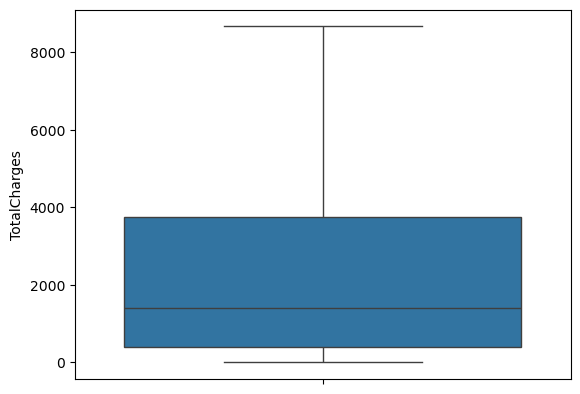

In [639]:
sns.boxplot(X_train['TotalCharges'])

<Axes: ylabel='TotalCharges'>

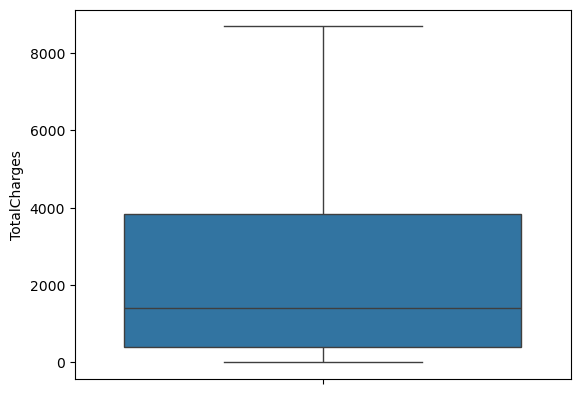

In [640]:
sns.boxplot(X_test['TotalCharges'])

Encode variables: *Basic Encoding*

In [641]:
# FOR TARGET VARIABLE, USE LABEL ENCODING
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train.shape, y_test.shape

((7859,), (3369,))

In [642]:
# One hot encoding
enc = OneHotEncoder()

X_train_ohe = enc.fit_transform(X_train)
X_test_ohe = enc.transform(X_test)

X_train_ohe.shape, X_test_ohe.shape

((7859, 42), (3369, 42))

In [643]:
# Count encoding
enc = CountFrequencyEncoder()

X_train_count = enc.fit_transform(X_train)
X_test_count = enc.transform(X_test)

X_train_count.shape, X_test_count.shape

((7859, 16), (3369, 16))

Encode variables: *Monotonic Encoding*

In [644]:
# Mean Integer Encoding
enc = MeanEncoder()

X_train_mean = enc.fit_transform(X_train, y_train)
X_test_mean = enc.transform(X_test)

X_train_mean.shape, X_test_mean.shape

((7859, 16), (3369, 16))

In [645]:
# Ordered Integer Encoding
enc = OrdinalEncoder()

X_train_ordered = enc.fit_transform(X_train, y_train)
X_test_ordered = enc.transform(X_test)

X_train_ordered.shape, X_test_ordered.shape

((7859, 16), (3369, 16))

In [646]:
# Weight of evidence
enc = WoEEncoder()

X_train_woe = enc.fit_transform(X_train, y_train)
X_test_woe = enc.transform(X_test)

X_train_woe.shape, X_test_woe.shape

((7859, 16), (3369, 16))

Logistic Regression Performance

In [647]:
def run_logistic(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=42)
    logit.fit(X_train, y_train)

    print("Train set")
    pred = logit.predict_proba(X_train)
    print("Logistic Regression roc-auc: {}".format(roc_auc_score(y_train, pred[:, 1])))

    print("Test set")
    pred = logit.predict_proba(X_test)
    print("Logistic Regression roc-auc: {}".format(roc_auc_score(y_test, pred[:, 1])))

In [648]:
print('One Hot Encoding roc-auc score (Logistic Regression):')
run_logistic(X_train_ohe, X_test_ohe, y_train, y_test)

One Hot Encoding roc-auc score (Logistic Regression):
Train set
Logistic Regression roc-auc: 0.8433268185894837
Test set
Logistic Regression roc-auc: 0.8305944485384426


In [649]:
print('Count Encoding roc-auc score (Logistic Regression):')
run_logistic(X_train_count, X_test_count, y_train, y_test)

Count Encoding roc-auc score (Logistic Regression):
Train set
Logistic Regression roc-auc: 0.8389340359048483
Test set
Logistic Regression roc-auc: 0.8281858129315758


In [650]:
print('Mean Encoding roc-auc score (Logistic Regression):')
run_logistic(X_train_mean, X_test_mean, y_train, y_test)

Mean Encoding roc-auc score (Logistic Regression):
Train set
Logistic Regression roc-auc: 0.8391917370724541
Test set
Logistic Regression roc-auc: 0.8300567701083545


In [651]:
print('Ordinal Encoding roc-auc score (Logistic Regression):')
run_logistic(X_train_ordered, X_test_ordered, y_train, y_test)

Ordinal Encoding roc-auc score (Logistic Regression):
Train set
Logistic Regression roc-auc: 0.8280326791666737
Test set
Logistic Regression roc-auc: 0.8196634733480718


In [652]:
print('Weight of Evidence Encoding roc-auc score (Logistic Regression):')
run_logistic(X_train_woe, X_test_woe, y_train, y_test)

Weight of Evidence Encoding roc-auc score (Logistic Regression):
Train set
Logistic Regression roc-auc: 0.8403173602919772
Test set
Logistic Regression roc-auc: 0.8305162076839798


One Hot Encoding & WoE Encoding have the highest score on the test set for this dataset

Feature Scaling

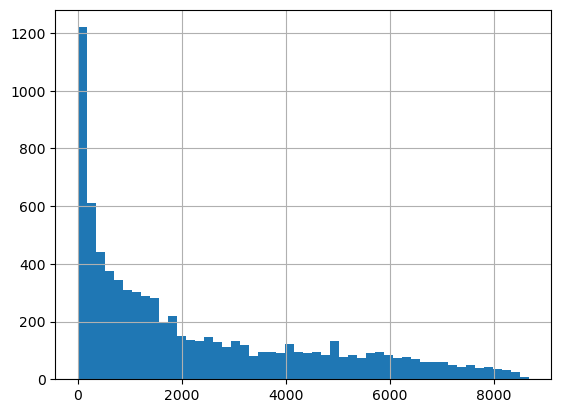

In [653]:
X_train_ohe['TotalCharges'].hist(bins=50);

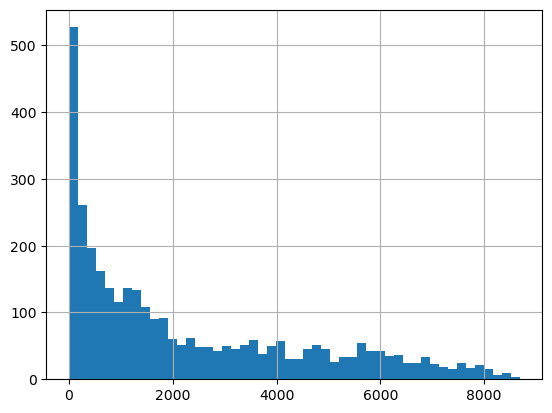

In [654]:
X_test_ohe['TotalCharges'].hist(bins=50);

Use min Max Scaler because it's not in normal distribution

In [655]:
X_train_ohe.head(3)

,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_Yes,Dependents_No,PhoneService_Yes,PhoneService_No,MultipleLines_No,...,StreamingMovies_No,Contract_One year,Contract_Month-to-month,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic)
7975,270.60,1,0,1,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
7650,5293.95,0,1,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
8862,612.10,1,0,0,1,0,1,1,0,1,...,1,0,1,0,0,1,0,0,1,0


In [656]:
X_train_scale = X_train_woe.copy()
X_test_scale = X_test_woe.copy()

scaler = MinMaxScaler()

# scale totalCharges only
X_train_scale['TotalCharges'] = scaler.fit_transform(X_train_scale['TotalCharges'].values.reshape(-1, 1))
X_test_scale['TotalCharges'] = scaler.transform(X_test_scale['TotalCharges'].values.reshape(-1, 1))

X_train_scale.shape, X_test_scale.shape

((7859, 16), (3369, 16))

In [657]:
X_train_scale.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
7975,0.022983,0.293898,-0.714323,0.017098,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.052855,-0.621655,-0.388726,0.031202
7650,-0.022554,-0.364836,-0.714323,0.017098,0.124019,-0.426509,0.680278,-0.279726,-0.215910,-0.724094,0.363262,0.162988,-1.052855,0.335600,-0.620943,0.610433
8862,0.022983,-0.364836,0.237943,0.017098,-0.083609,-0.426509,0.680278,-0.279726,0.571041,0.692830,0.363262,0.348999,0.739166,0.335600,0.812059,0.070580


In [658]:
# combine X_scale with y into dataframe
X_train_scale['Churn'] = y_train
X_test_scale['Churn'] = y_test

X_train_scale.shape, X_test_scale.shape

((7859, 17), (3369, 17))

In [659]:
# concat into 1 dataframe again
combined_df = pd.concat([X_train_scale, X_test_scale], axis=0)
combined_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
7975,0.022983,0.293898,-0.714323,0.017098,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.052855,-0.621655,-0.388726,0.031202,0
7650,-0.022554,-0.364836,-0.714323,0.017098,0.124019,-0.426509,0.680278,-0.279726,-0.215910,-0.724094,0.363262,0.162988,-1.052855,0.335600,-0.620943,0.610433,1
8862,0.022983,-0.364836,0.237943,0.017098,-0.083609,-0.426509,0.680278,-0.279726,0.571041,0.692830,0.363262,0.348999,0.739166,0.335600,0.812059,0.070580,0
578,-0.022554,-0.364836,0.237943,0.017098,0.124019,0.698100,-0.711706,-0.279726,0.571041,0.692830,0.363262,0.162988,0.739166,0.335600,0.812059,0.388056,0
6954,-0.022554,0.293898,0.237943,0.017098,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,0.739166,0.335600,-0.388726,0.035676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,0.022983,-0.364836,0.237943,0.017098,0.124019,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-2.673984,0.335600,-0.702082,0.186210,0
9465,0.022983,-0.364836,-0.714323,0.017098,-0.083609,-0.426509,-0.711706,-0.279726,-0.215910,0.692830,0.363262,0.162988,-2.673984,-0.621655,-0.702082,0.563647,0
473,-0.022554,-0.364836,0.237943,0.017098,-0.083609,-0.426509,-0.711706,0.615266,0.571041,-0.724094,0.363262,0.348999,0.739166,-0.621655,-0.388726,0.151670,0
6555,-0.022554,0.293898,0.237943,0.017098,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.052855,-0.621655,-0.388726,0.047420,0


Outliers Checking

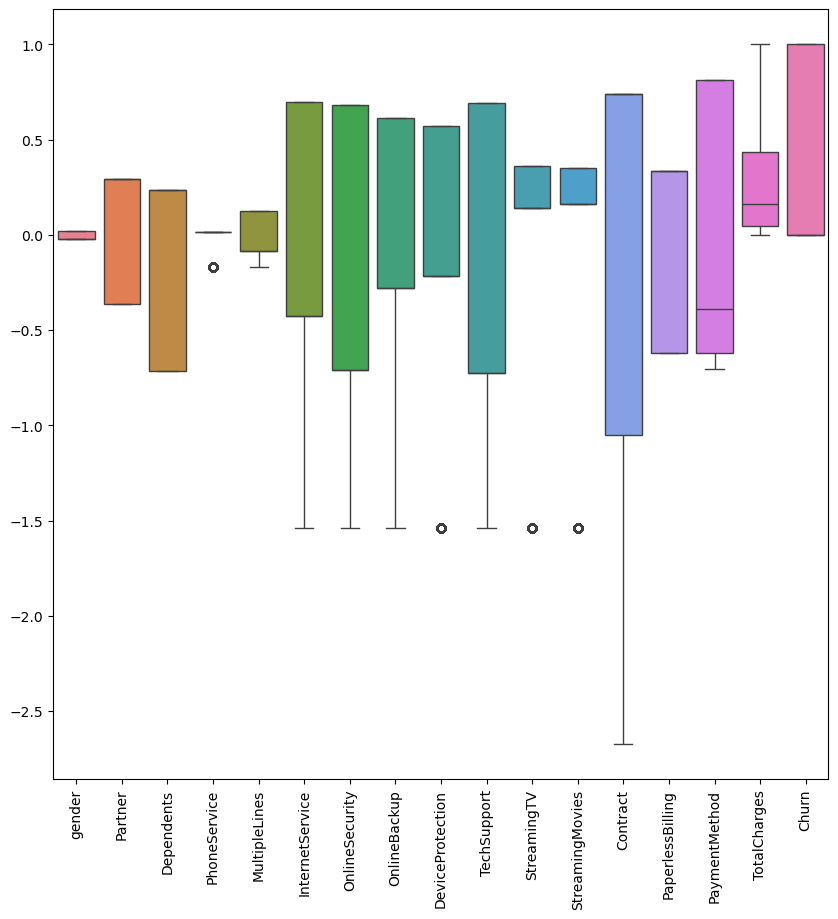

In [660]:
plt.figure(figsize=(10, 10))
sns.boxplot(combined_df[combined_df.columns])
plt.xticks(rotation=90)
plt.show()

In [661]:
combined_df.PhoneService.value_counts()

PhoneService
 0.017098    10137
-0.166409     1091
Name: count, dtype: int64

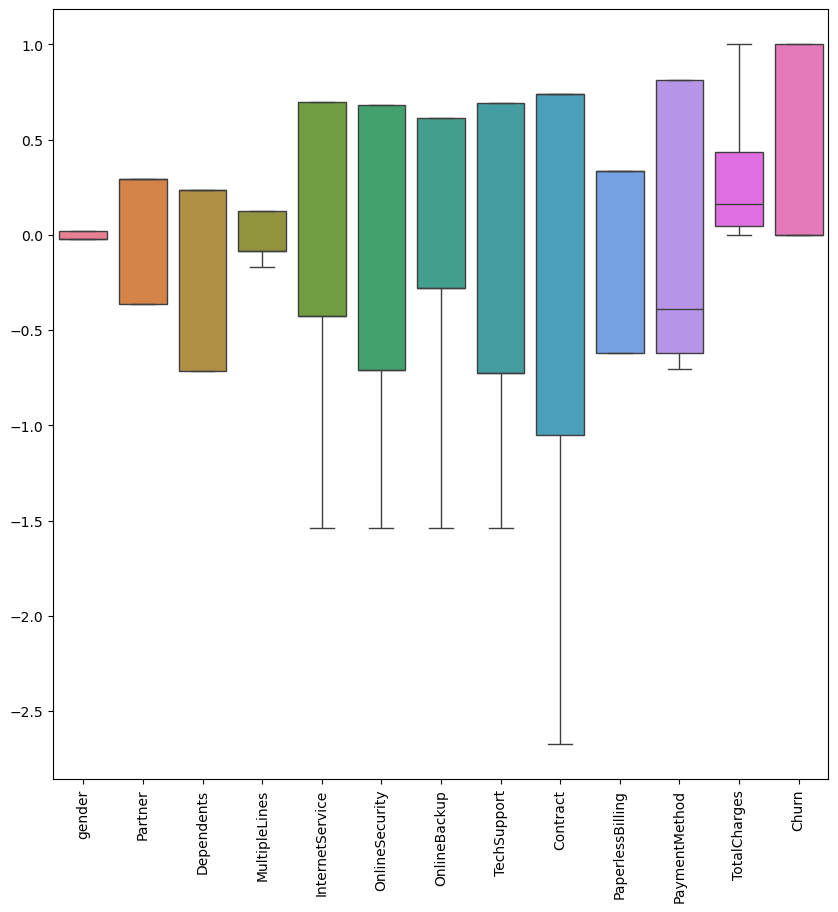

In [662]:
# these columns caused error in streamlit for suvbmission
cols = ['PhoneService', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']

combined_df = combined_df.drop(cols, axis=1)
plt.figure(figsize=(10, 10))
sns.boxplot(combined_df[combined_df.columns])
plt.xticks(rotation=90)
plt.show()

In [663]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11228 entries, 7975 to 7743
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            11228 non-null  float64
 1   Partner           11228 non-null  float64
 2   Dependents        11228 non-null  float64
 3   MultipleLines     11228 non-null  float64
 4   InternetService   11228 non-null  float64
 5   OnlineSecurity    11228 non-null  float64
 6   OnlineBackup      11228 non-null  float64
 7   TechSupport       11228 non-null  float64
 8   Contract          11228 non-null  float64
 9   PaperlessBilling  11228 non-null  float64
 10  PaymentMethod     11228 non-null  float64
 11  TotalCharges      11228 non-null  float64
 12  Churn             11228 non-null  int32  
dtypes: float64(12), int32(1)
memory usage: 1.2 MB


In [664]:
# submit our clean dataset
clean_df_chn = combined_df.copy()
clean_df_chn.to_csv('clean_dataset/churn_data.csv', index=False)

## 3. Data FDC.csv

In [665]:
df_fdc = pd.read_csv('dataset/FDC.csv')
df_fdc.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


TODO:
- Handle missing values
- Convert numerical-like object to numerical dtypes
- Remove unnecessary columns

In [666]:
df_fdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [667]:
check_data(df_fdc)

There are 149 missing values in the dataset.
There are 0 duplicated values in the dataset.


Numerical columns

In [668]:
num_cols = [var for var in df_fdc.columns if df_fdc[var].dtypes != 'O']

for col in num_cols:
    mean_col = df_fdc[col].mean()
    df_fdc[col].fillna(mean_col, inplace=True)

check_data(df_fdc)

There are 50 missing values in the dataset.
There are 0 duplicated values in the dataset.


Object columns

In [670]:
obj_cols = [var for var in df_fdc.columns if df_fdc[var].dtypes == 'O']
df_fdc[obj_cols].head()

,GPA,comfort_food,comfort_food_reasons,diet_current,eating_changes,father_profession,fav_cuisine,food_childhood,healthy_meal,ideal_diet,meals_dinner_friend,mother_profession,type_sports,weight
0,2.4,none,we dont have comfort,eat good and exercise,eat faster,profesor,Arabic cuisine,rice and chicken,looks not oily,being healthy,"rice, chicken, soup",unemployed,car racing,187
1,3.654,"chocolate, chips, ice cream","Stress, bored, anger",I eat about three times a day with some snacks...,I eat out more than usual.,Self employed,Italian,"chicken and biscuits, beef soup, baked beans","Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,"Pasta, steak, chicken",Nurse RN,Basketball,155
2,3.3,"frozen yogurt, pizza, fast food","stress, sadness","toast and fruit for breakfast, salad for lunch...",sometimes choosing to eat fast food instead of...,owns business,italian,"mac and cheese, pizza, tacos",usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,"chicken and rice with veggies, pasta, some kin...",owns business,none,I'm not answering this.
3,3.2,"Pizza, Mac and cheese, ice cream",Boredom,"College diet, cheap and easy foods most nights...",Accepting cheap and premade/store bought foods,Mechanic,Turkish,"Beef stroganoff, tacos, pizza","Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",Grilled chicken \rStuffed Shells\rHomemade Chili,Special Education Teacher,NaN,"Not sure, 240"
4,3.5,"Ice cream, chocolate, chips","Stress, boredom, cravings",I try to eat healthy but often struggle becaus...,I have eaten generally the same foods but I do...,IT,Italian,"Pasta, chicken tender, pizza","A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",Substance Abuse Conselor,Softball,190


In [672]:
df_fdc['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [673]:
df_fdc['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

Converting GPA & weight into numerical dtypes

In [674]:
df_fdc['GPA'] = pd.to_numeric(df_fdc['GPA'], errors='coerce')
df_fdc['GPA'].fillna(df_fdc['GPA'].mean(), inplace=True)

df_fdc['weight'] = pd.to_numeric(df_fdc['weight'], errors='coerce')
df_fdc['weight'].fillna(df_fdc['weight'].mean(), inplace=True)

In [676]:
df_fdc['GPA'].unique()

array([2.4       , 3.654     , 3.3       , 3.2       , 3.5       ,
       2.25      , 3.8       , 3.904     , 3.4       , 3.6       ,
       3.1       , 3.41555833, 4.        , 2.2       , 3.87      ,
       3.7       , 3.9       , 2.8       , 3.        , 3.65      ,
       3.89      , 2.9       , 3.605     , 3.83      , 3.292     ,
       3.35      , 2.6       , 3.67      , 3.73      , 2.71      ,
       3.68      , 3.75      , 3.92      , 3.77      , 3.63      ,
       3.882     ])

In [677]:
df_fdc['weight'].unique()

array([187. , 155. , 158.5, 190. , 180. , 137. , 125. , 116. , 110. ,
       264. , 123. , 185. , 145. , 170. , 135. , 165. , 175. , 195. ,
       105. , 160. , 167. , 115. , 205. , 128. , 150. , 140. , 120. ,
       100. , 113. , 168. , 169. , 200. , 265. , 192. , 118. , 210. ,
       112. , 130. , 127. , 129. , 260. , 184. , 230. , 138. , 156. ])

In [678]:
check_data(df_fdc)

There are 46 missing values in the dataset.
There are 0 duplicated values in the dataset.


In [682]:
df_fdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    125 non-null    float64
 10  cook                          125 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       125 non-null    float64
 13  diet_

In [679]:
df_fdc.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,3.028302,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3.000000,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.300,1,1,720,4.000000,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,158.5
3,3.200,1,1,430,3.000000,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,158.5
4,3.500,1,1,720,2.000000,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0


In [684]:
for col in obj_cols:
    print(df_fdc[col].value_counts().sort_values(ascending=False))
    print('-'*50)

GPA
3.500000    13
3.000000    11
3.200000    10
3.700000    10
3.300000     9
3.400000     9
3.900000     7
3.600000     7
3.800000     6
3.415558     5
2.800000     5
4.000000     4
3.100000     3
2.900000     2
3.830000     2
2.600000     2
2.250000     1
3.904000     1
3.292000     1
2.200000     1
3.870000     1
3.654000     1
3.650000     1
3.890000     1
3.605000     1
3.750000     1
2.400000     1
3.670000     1
3.730000     1
2.710000     1
3.680000     1
3.630000     1
3.770000     1
3.920000     1
3.350000     1
3.882000     1
Name: count, dtype: int64
--------------------------------------------------
comfort_food
none                                            1
cookies, donuts, candy bars                     1
frozen yogurt, pizza, fast food                 1
Pizza, Mac and cheese, ice cream                1
Ice cream, chocolate, chips                     1
                                               ..
Pizza / Wings / Cheesecake                      1
rice, potato, se

In [690]:
df_fdc['fav_cuisine'].value_counts().sort_values(ascending=False)

fav_cuisine
italian                                     28
italian                                     21
mexican                                      5
mexican                                      5
american                                     4
chinese                                      3
american                                     3
chinese                                      3
thai                                         2
korean                                       2
asian                                        2
indian                                       2
chicken                                      1
turkish                                      1
african                                      1
anything american style.                     1
seafood                                      1
orange chicken and chow mani noodles         1
italian food                                 1
jamaican                                     1
american or italian                          1
f

In [691]:
num_cols = []

for col in df_fdc.columns:
    if df_fdc[col].dtypes != 'O':
        num_cols.append(col)

clean_df_fdc = df_fdc[num_cols]

In [692]:
clean_df_fdc

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,3.028302,315.0,1,9.000000,2.000000,9,...,3.0,1.0,1.000000,1,1165.0,345,5,1,1315,187.0
1,3.654,1,1,610,3.000000,420.0,2,1.000000,3.000000,1,...,3.0,1.0,1.000000,2,725.0,690,4,2,900,155.0
2,3.300,1,1,720,4.000000,420.0,2,1.000000,1.000000,1,...,6.0,1.0,2.000000,5,1165.0,500,5,1,900,158.5
3,3.200,1,1,430,3.000000,420.0,2,2.000000,2.000000,2,...,5.0,1.0,2.000000,5,725.0,690,3,1,1315,158.5
4,3.500,1,1,720,2.000000,420.0,2,1.000000,1.000000,1,...,4.0,1.0,1.000000,4,940.0,500,4,2,760,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.500,1,1,610,4.000000,420.0,2,2.698113,3.000000,2,...,4.0,1.0,1.000000,5,940.0,500,5,1,1315,156.0
121,3.000,1,1,265,2.000000,315.0,2,2.698113,3.000000,3,...,4.0,1.0,1.390244,4,940.0,500,5,2,1315,180.0
122,3.882,1,1,720,3.028302,420.0,1,2.698113,3.000000,3,...,4.0,1.0,2.000000,5,580.0,690,4,2,1315,120.0
123,3.000,2,1,720,4.000000,420.0,1,2.698113,3.000000,7,...,2.0,2.0,2.000000,1,940.0,500,3,1,1315,135.0


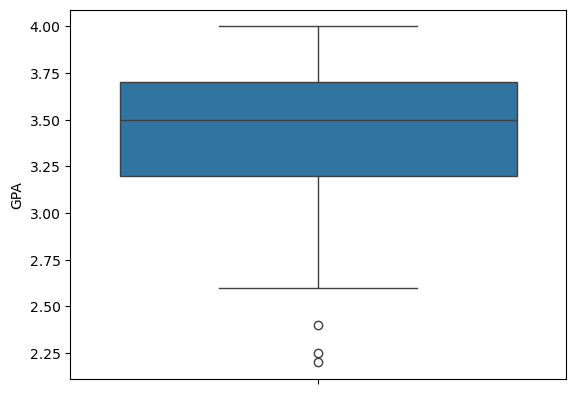

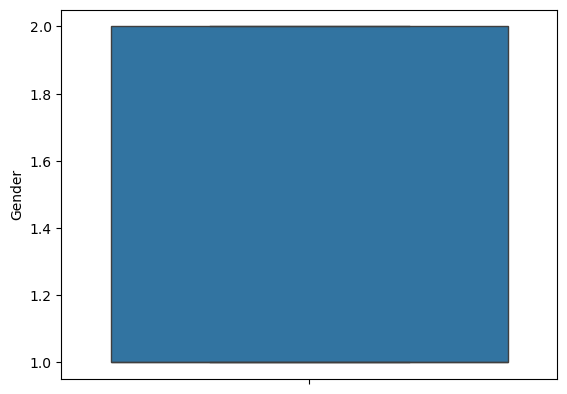

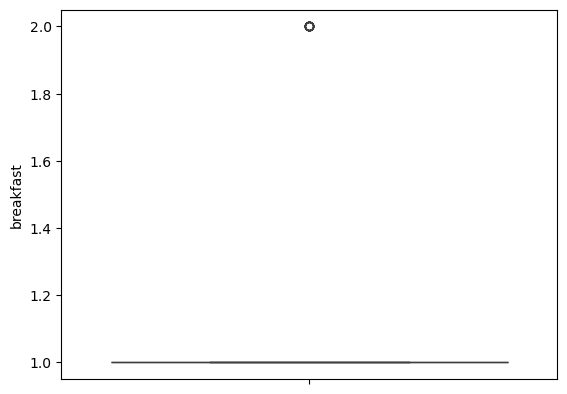

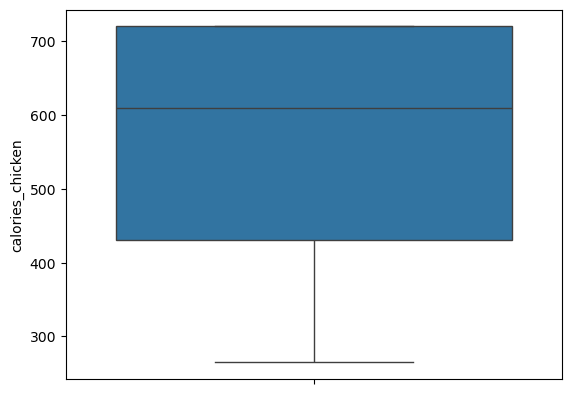

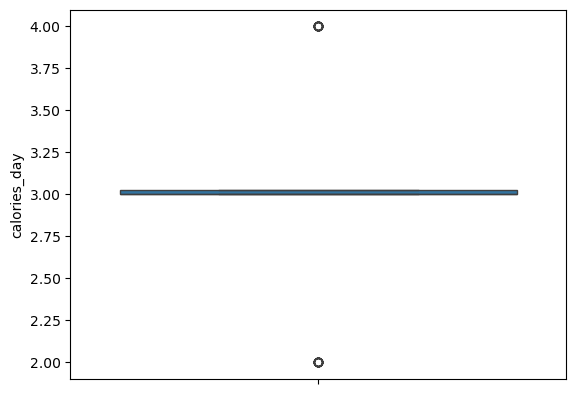

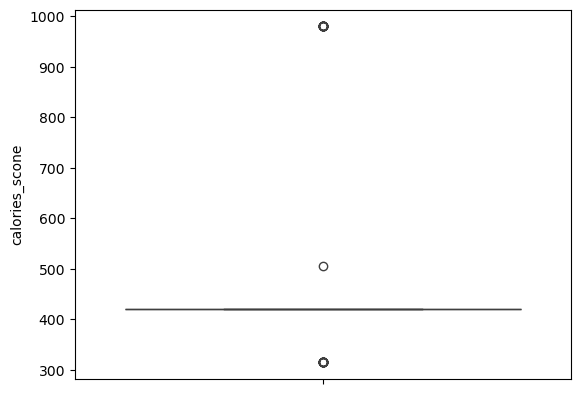

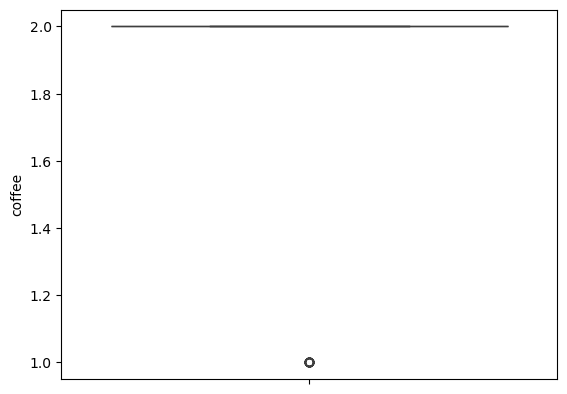

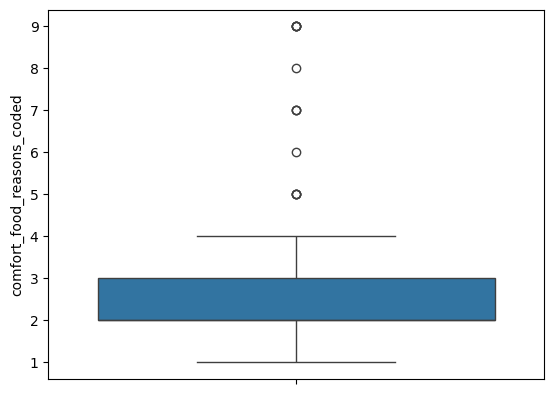

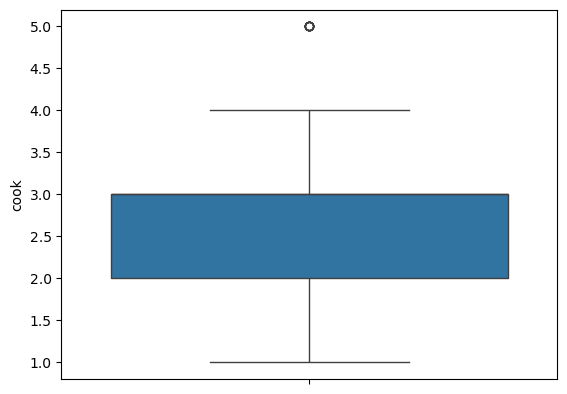

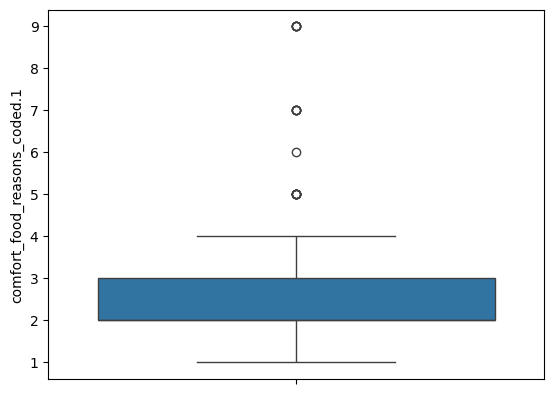

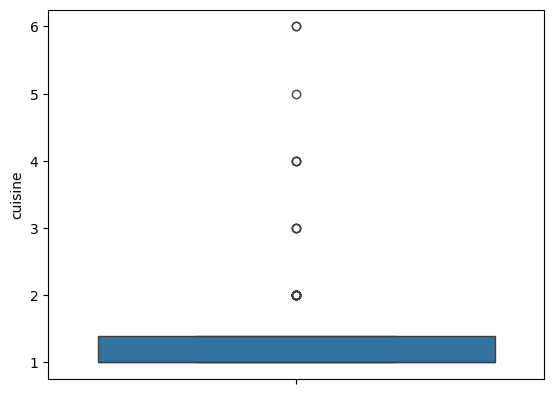

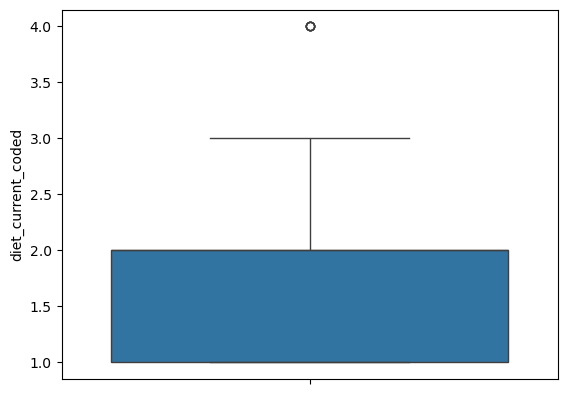

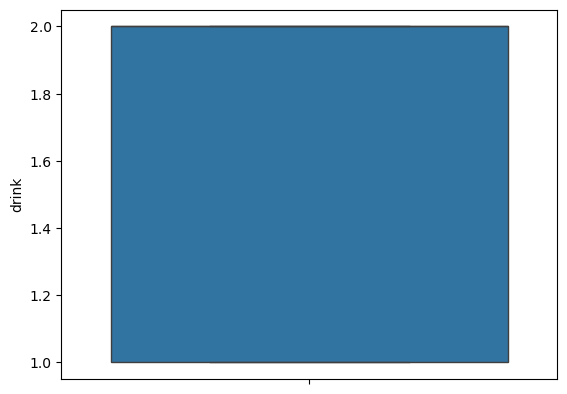

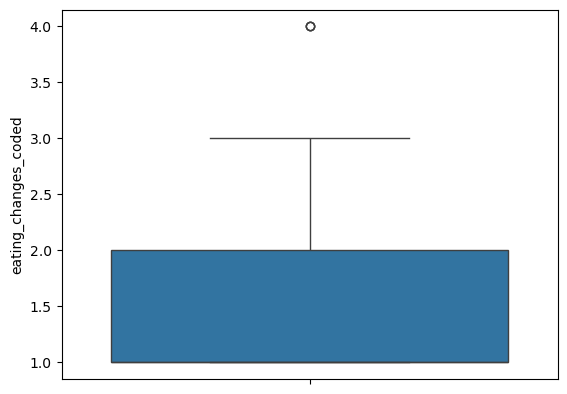

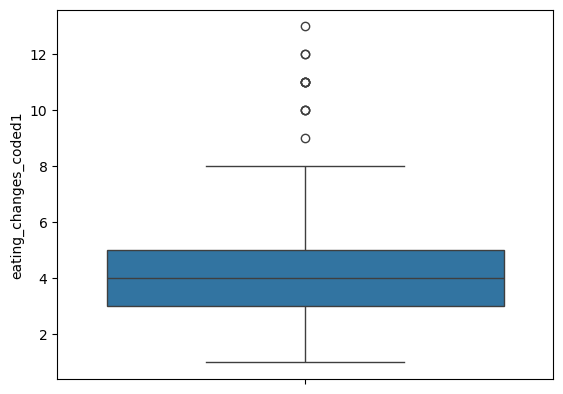

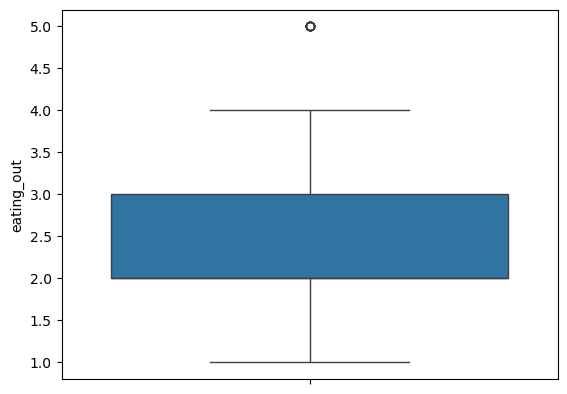

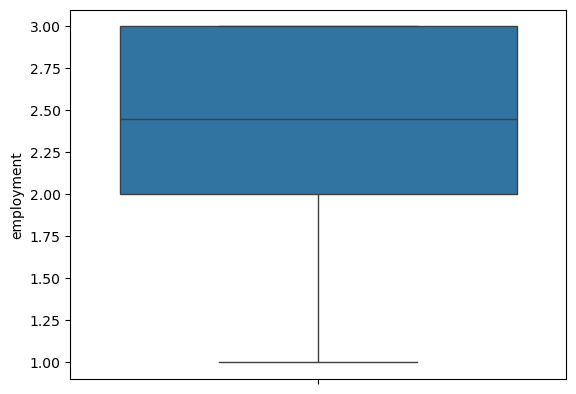

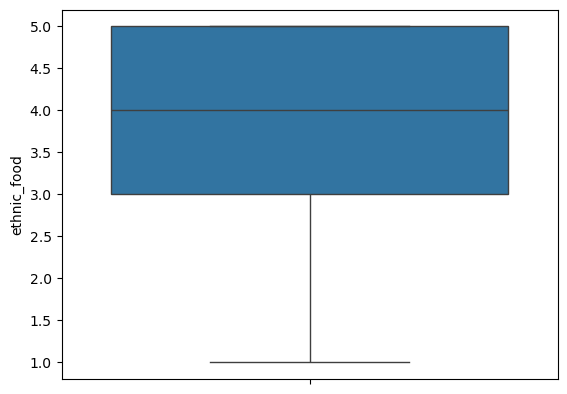

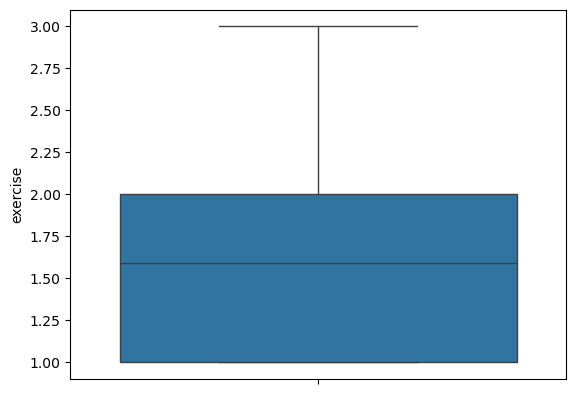

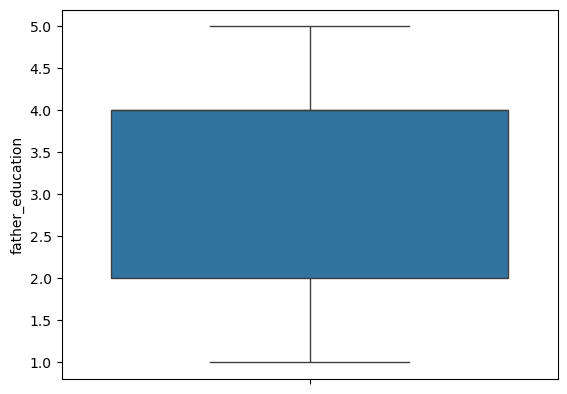

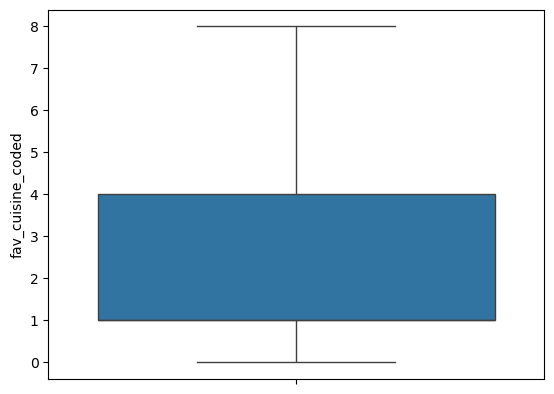

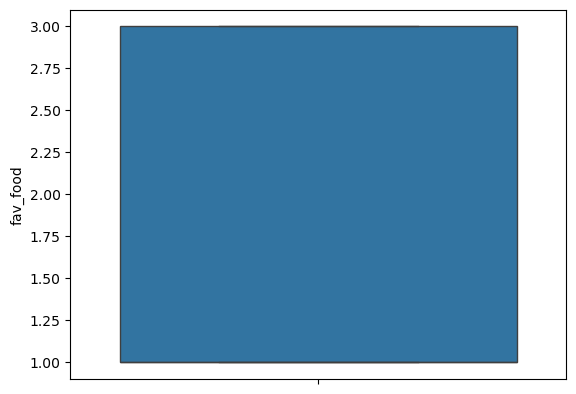

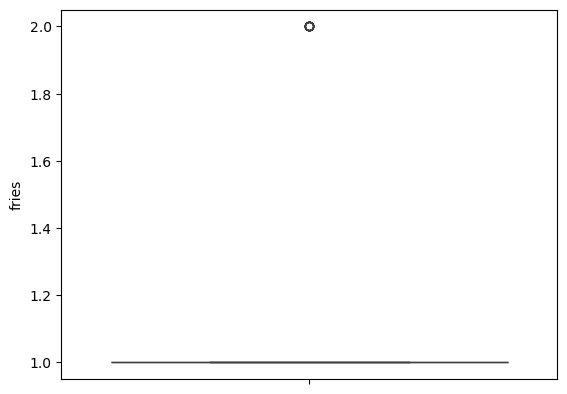

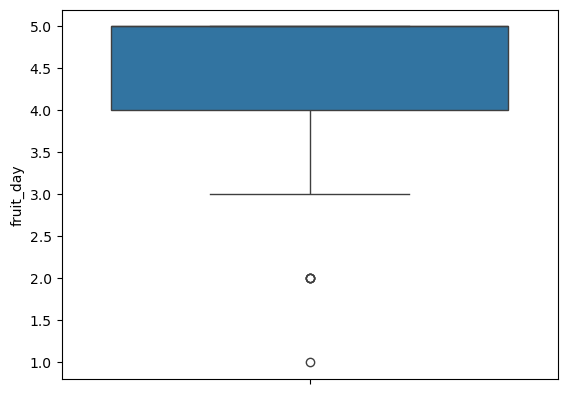

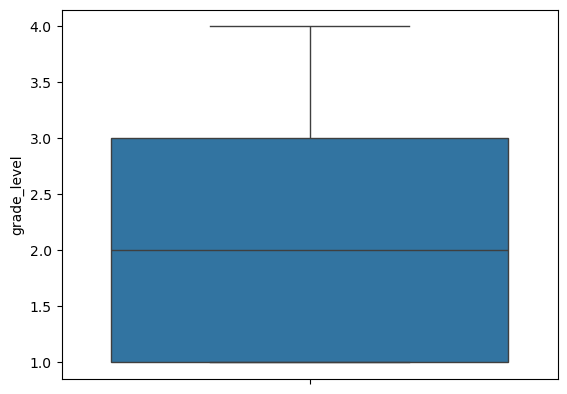

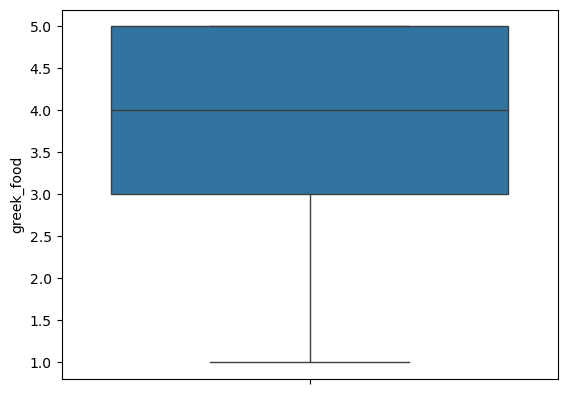

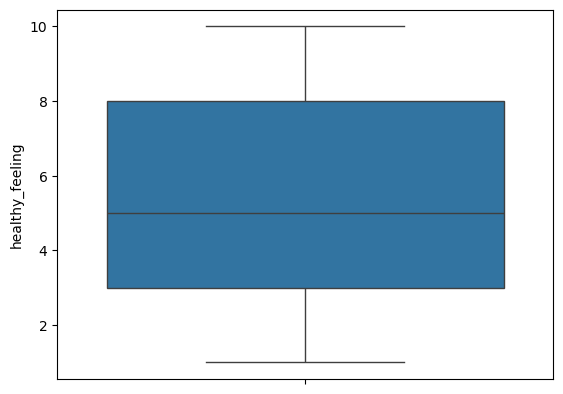

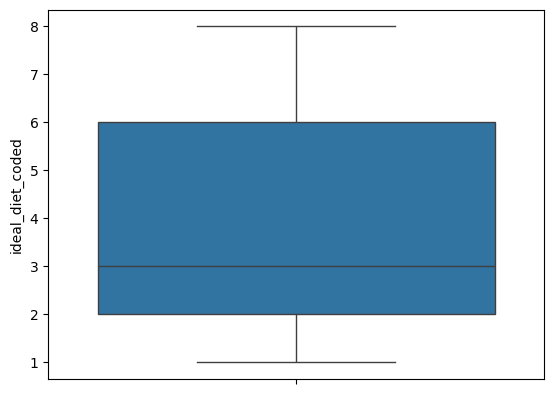

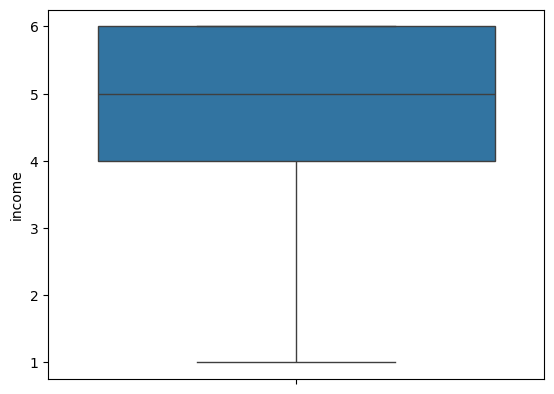

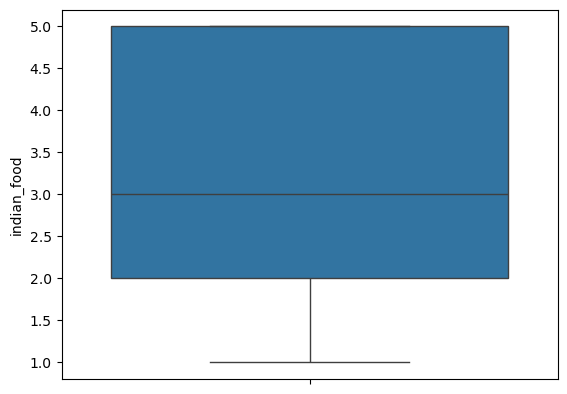

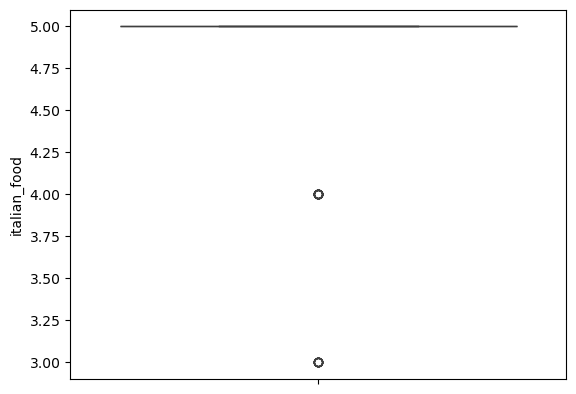

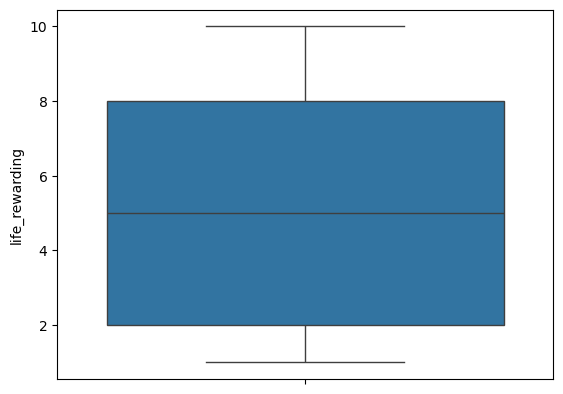

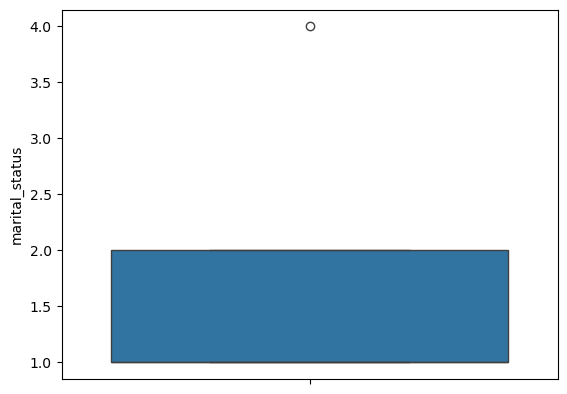

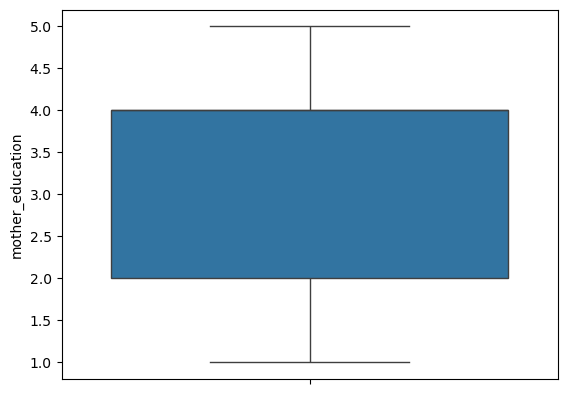

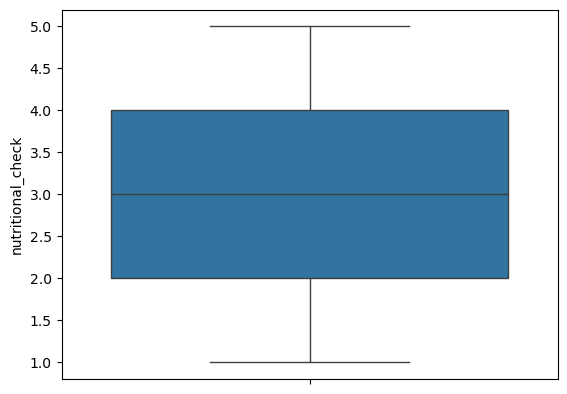

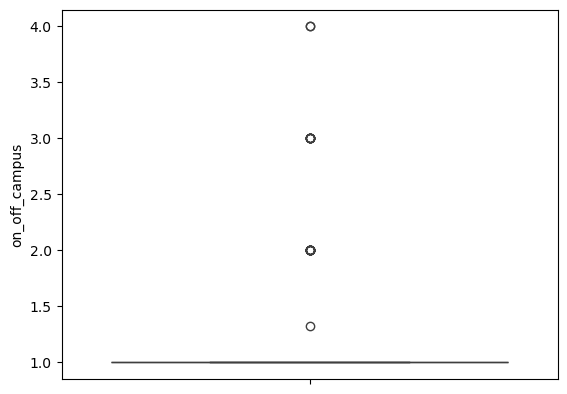

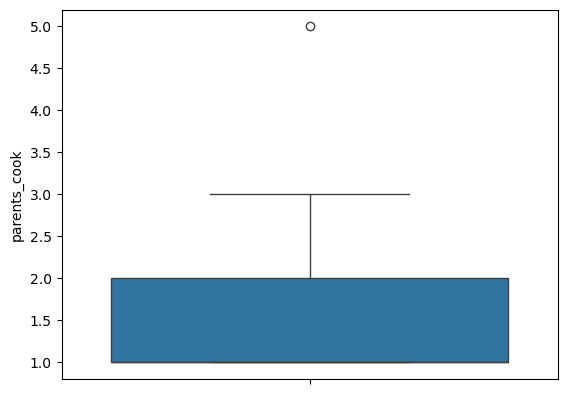

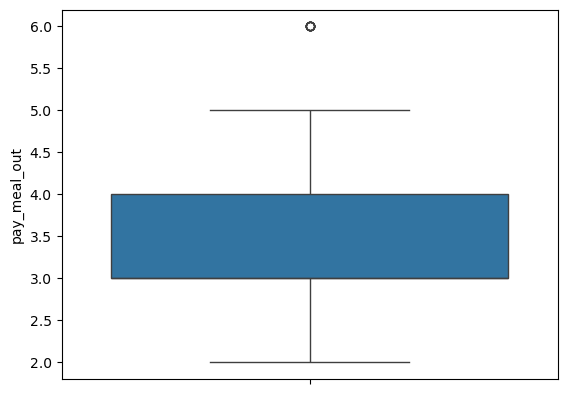

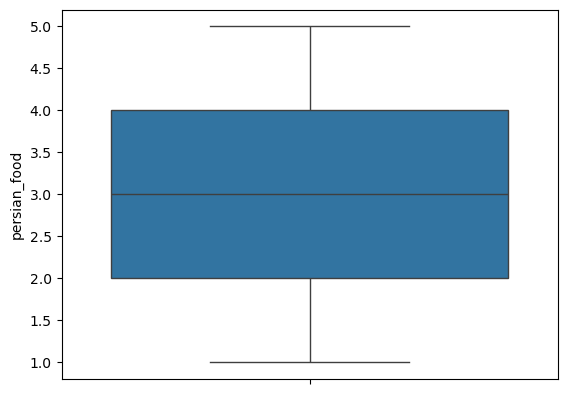

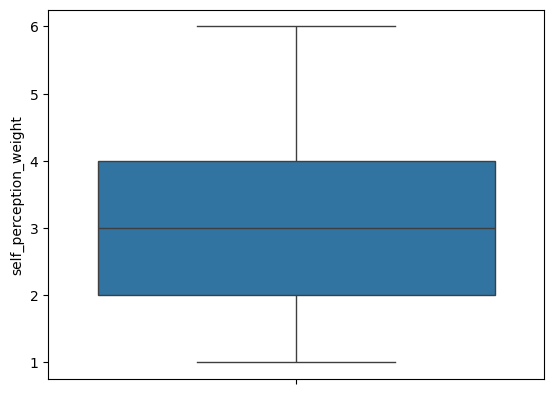

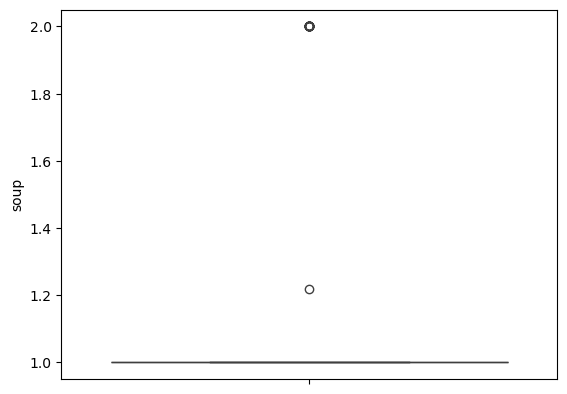

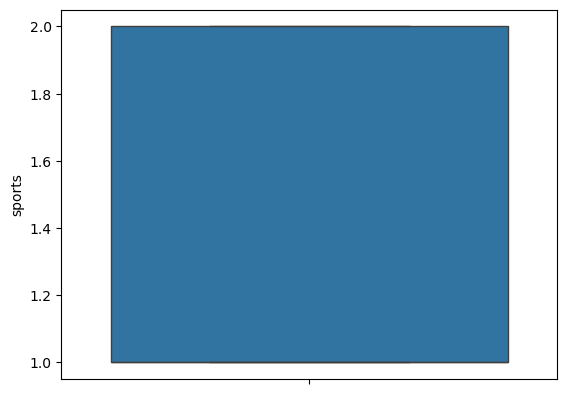

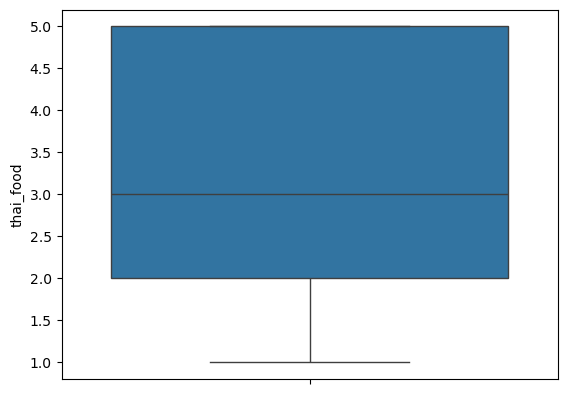

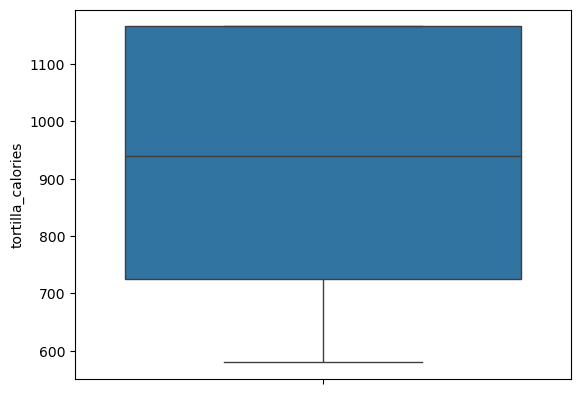

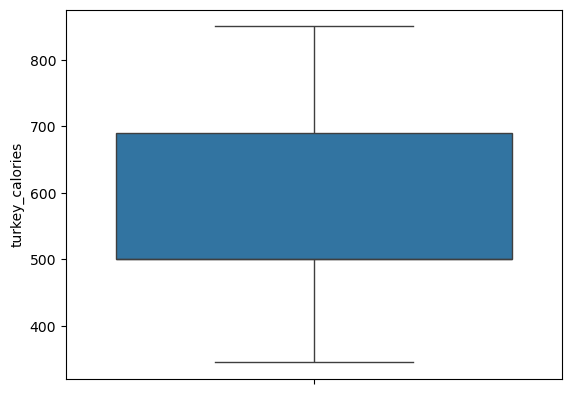

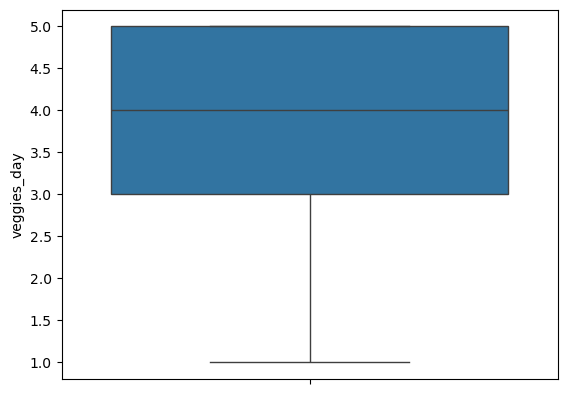

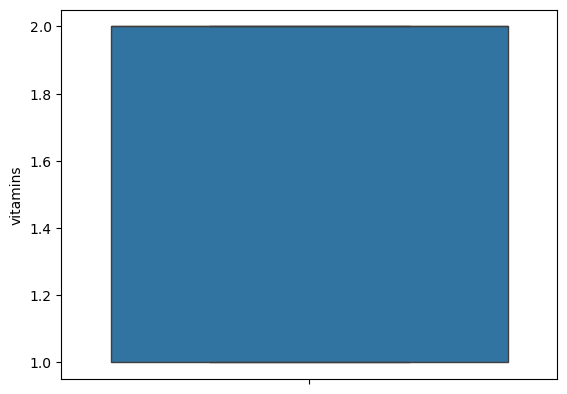

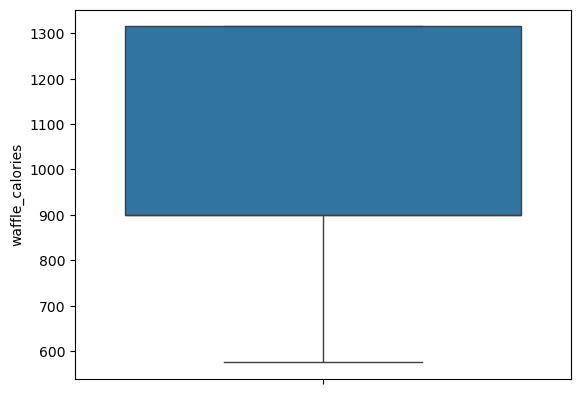

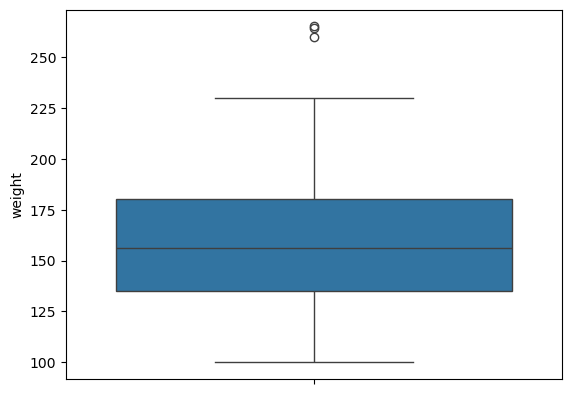

In [696]:
for i in clean_df_fdc.columns:
    sns.boxplot(clean_df_fdc[i])
    plt.show()

In [697]:
# cap outliers
from feature_engine.outliers import ArbitraryOutlierCapper

winsor = Winsorizer(capping_method='gaussian')

clean_df_fdc = winsor.fit_transform(clean_df_fdc)

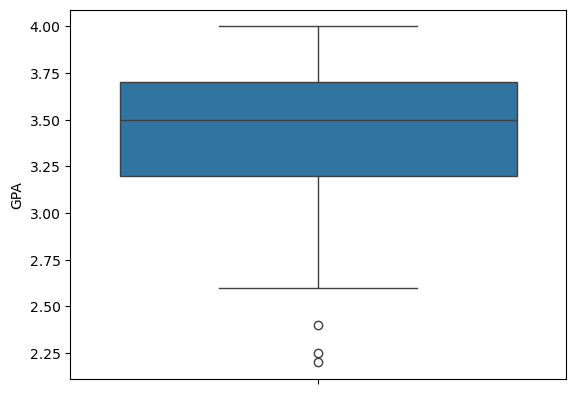

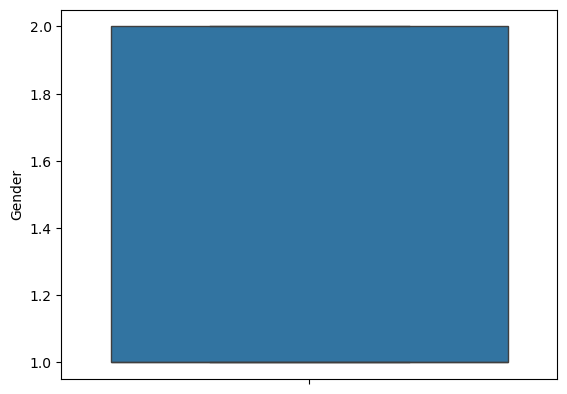

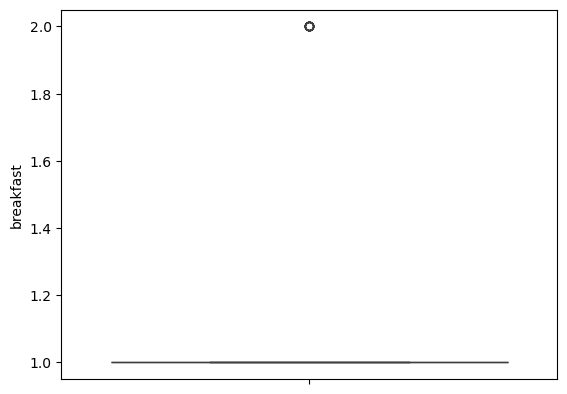

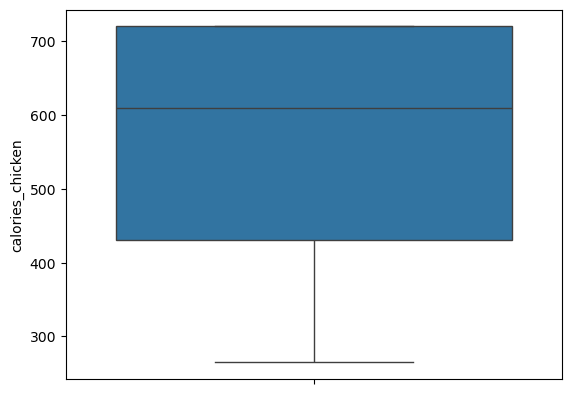

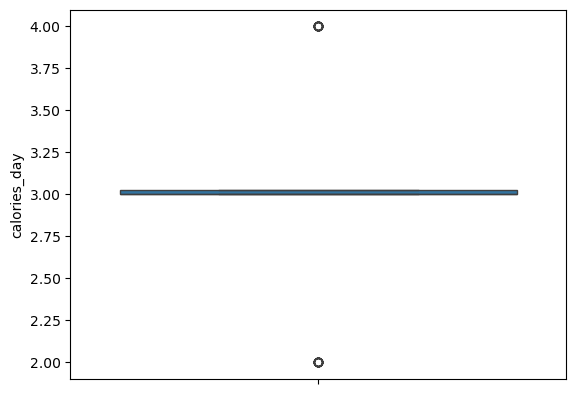

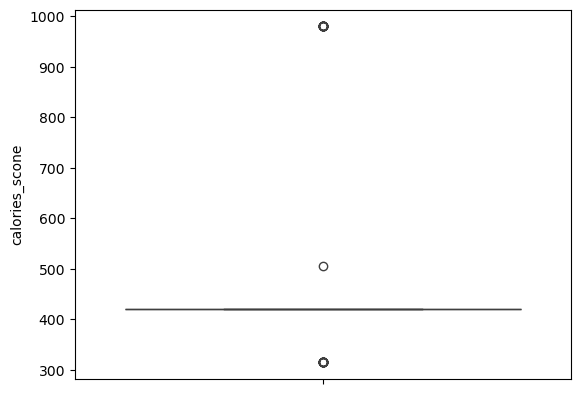

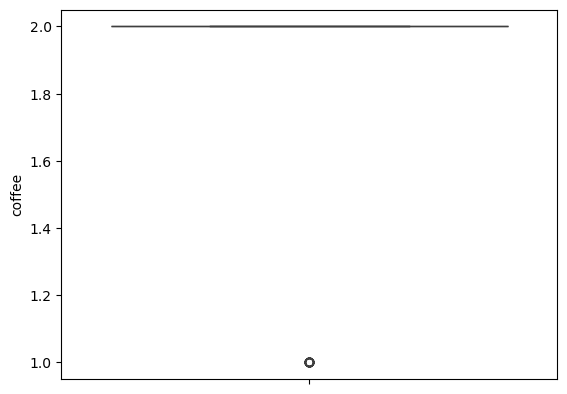

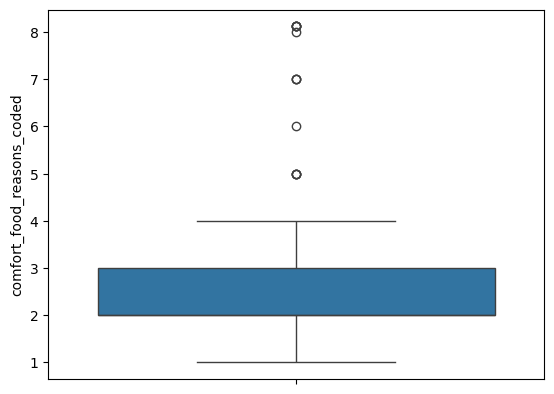

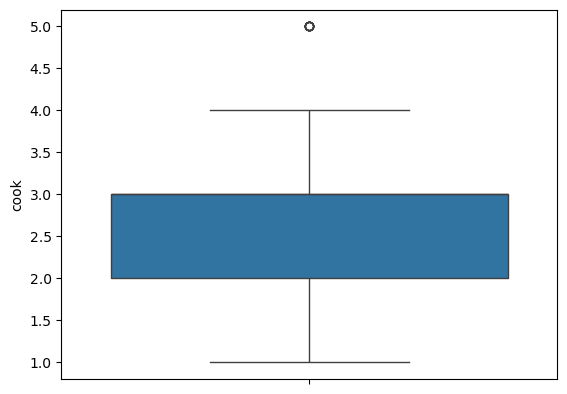

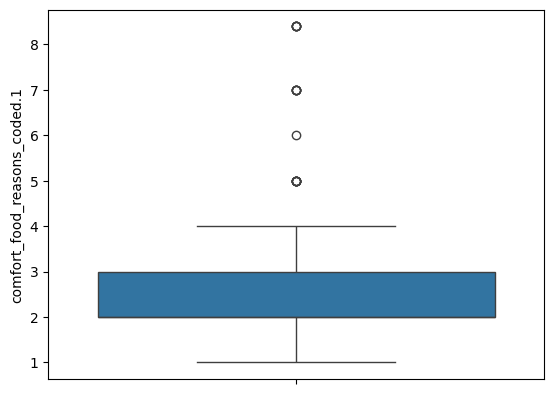

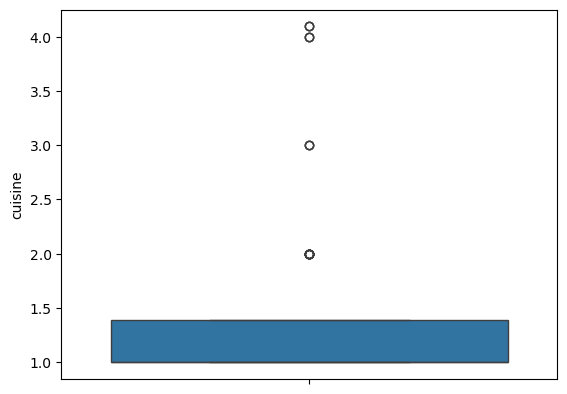

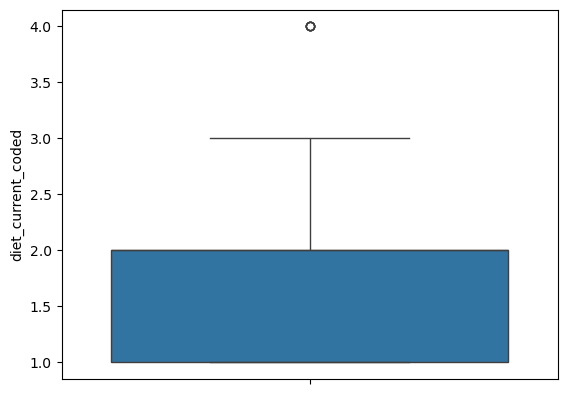

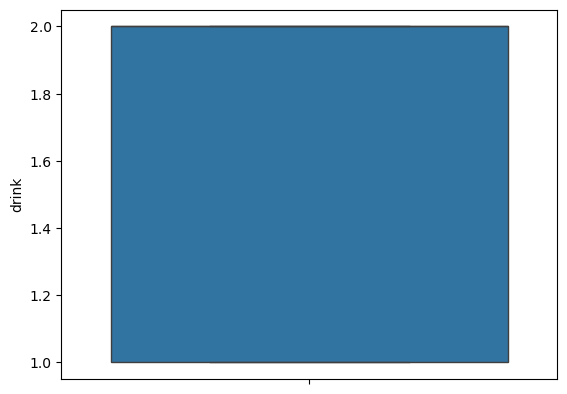

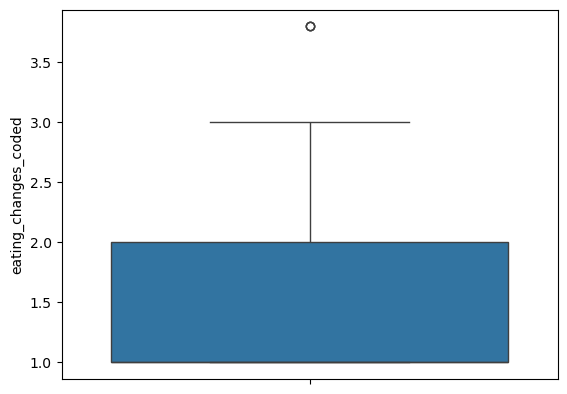

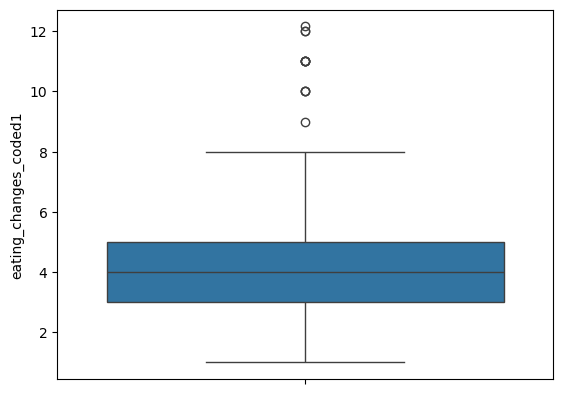

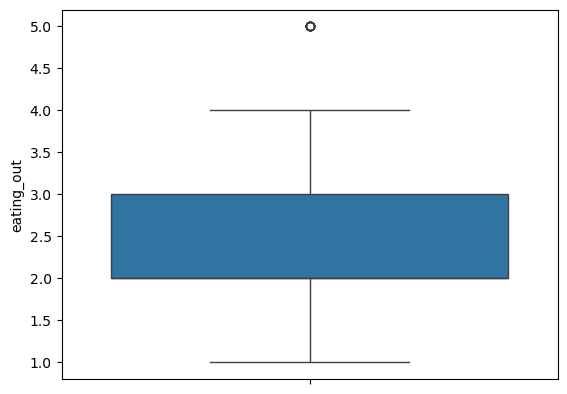

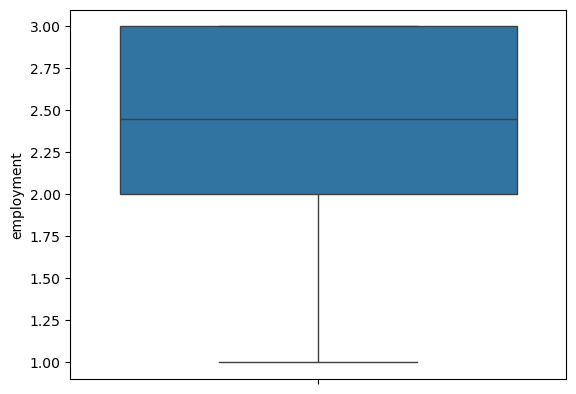

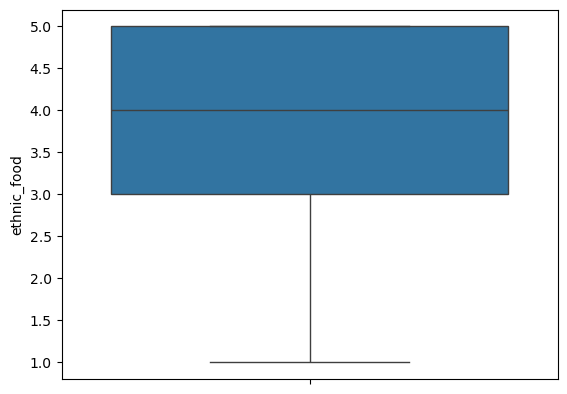

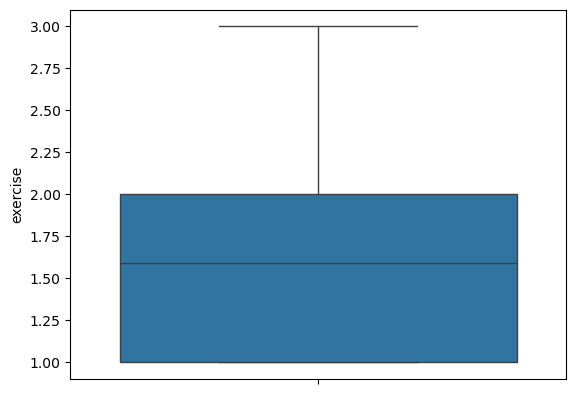

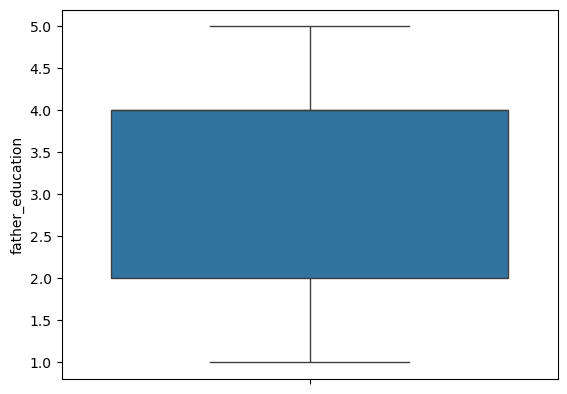

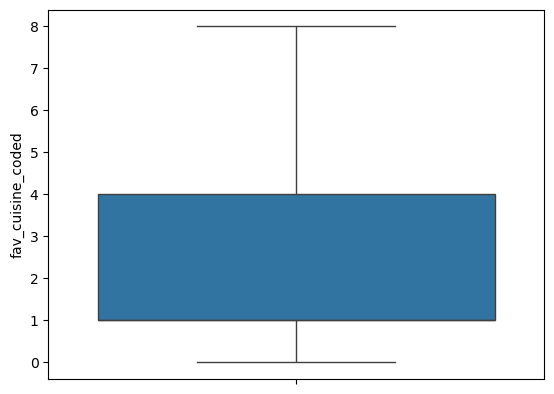

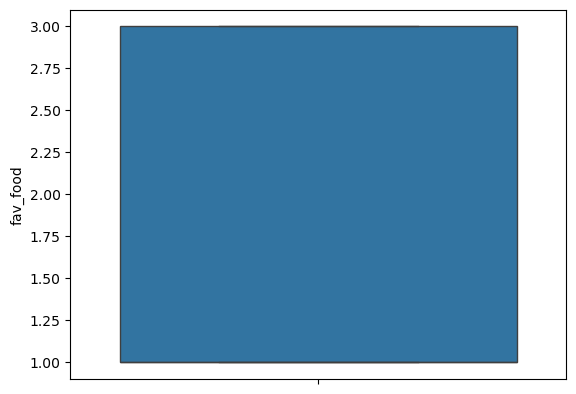

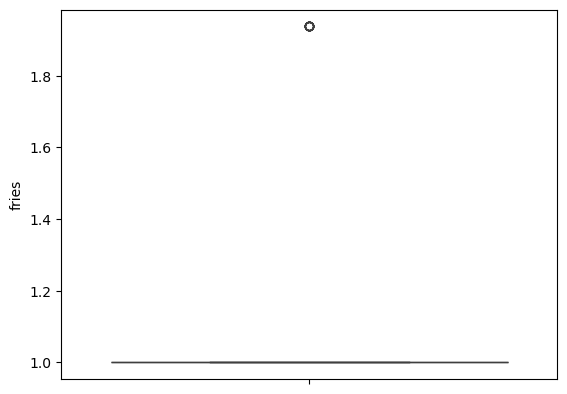

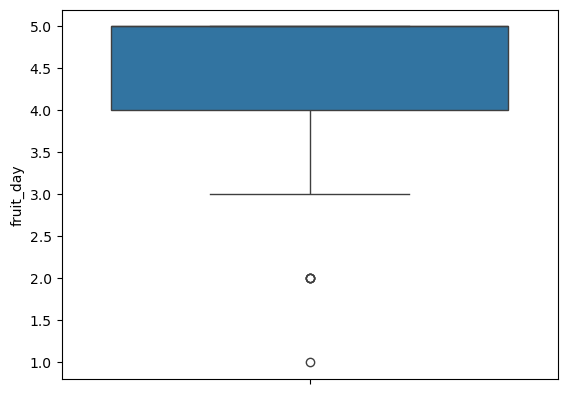

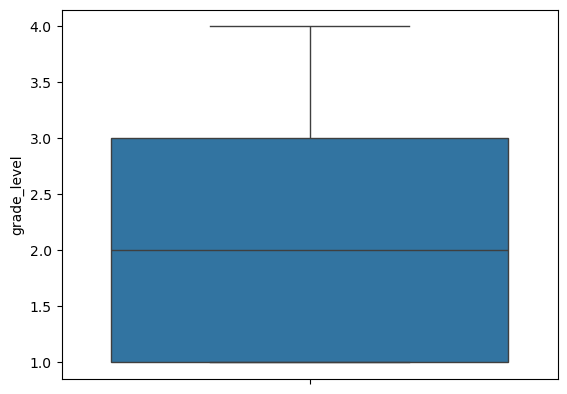

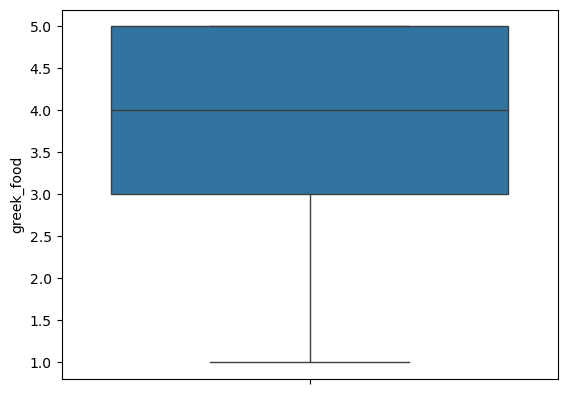

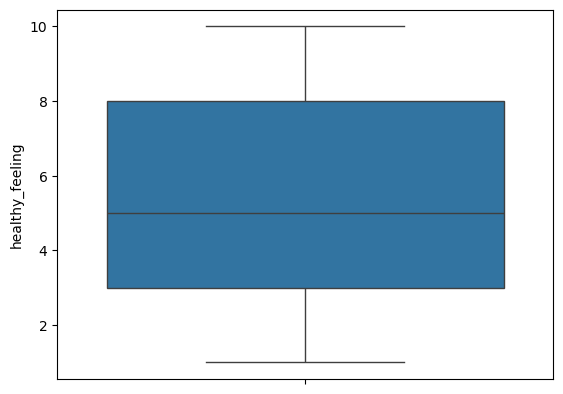

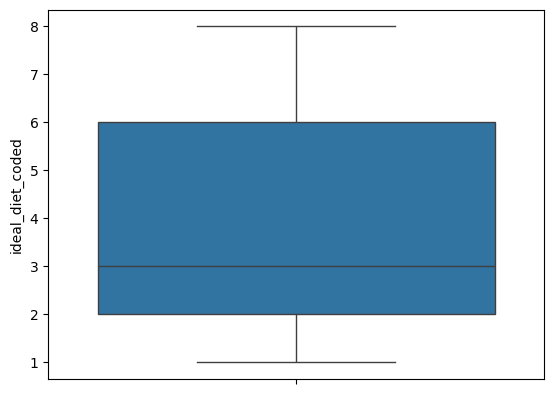

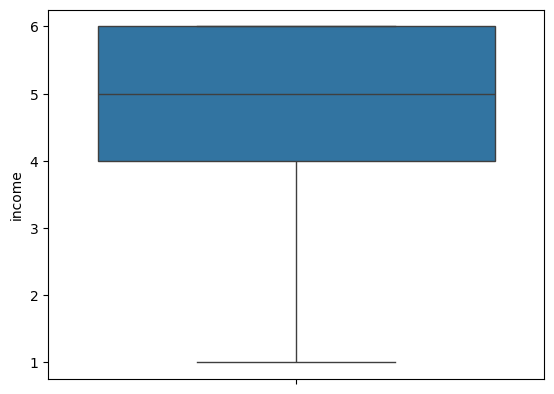

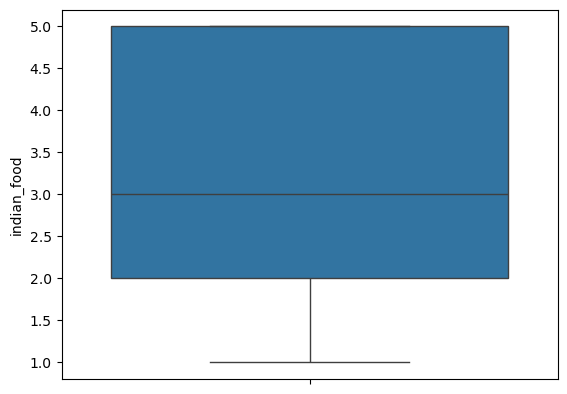

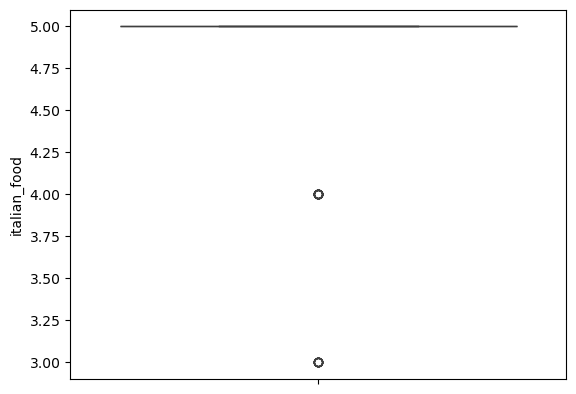

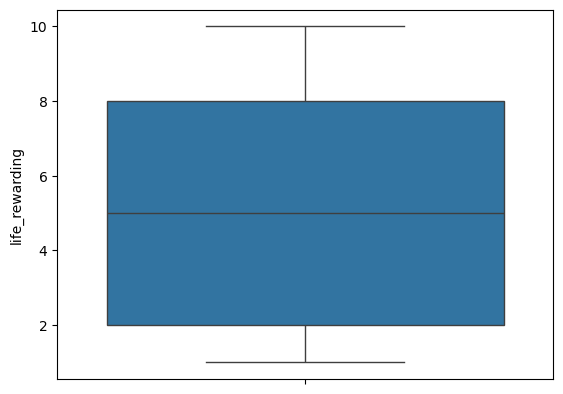

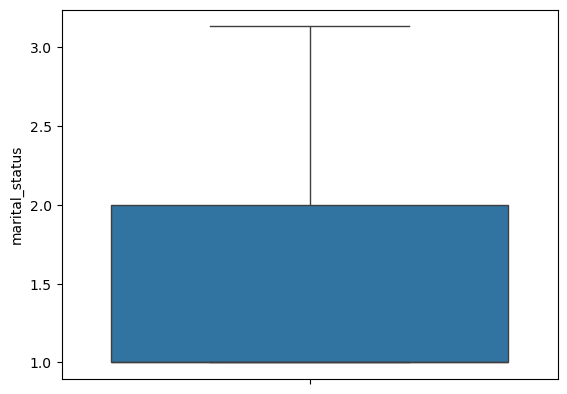

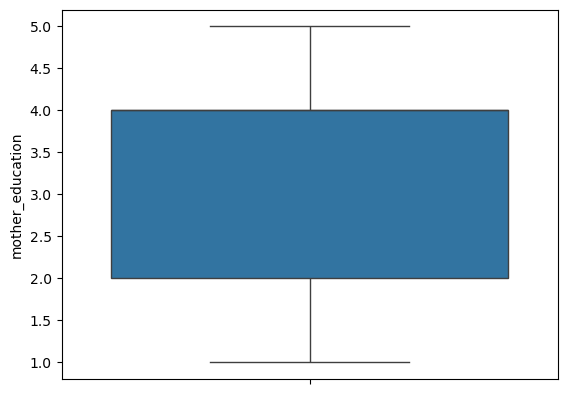

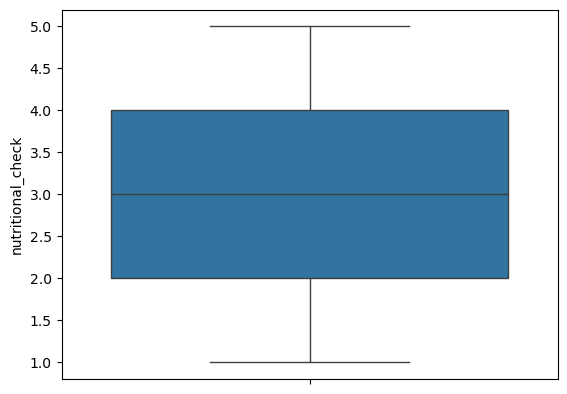

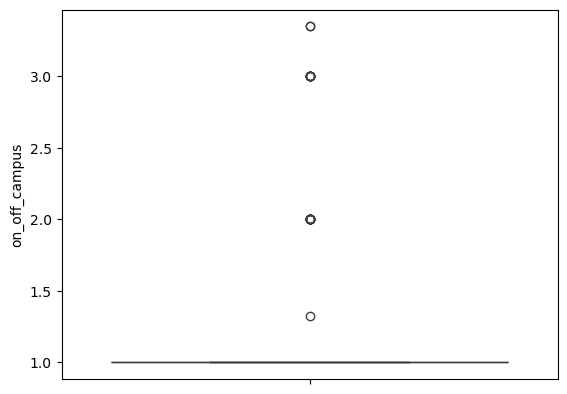

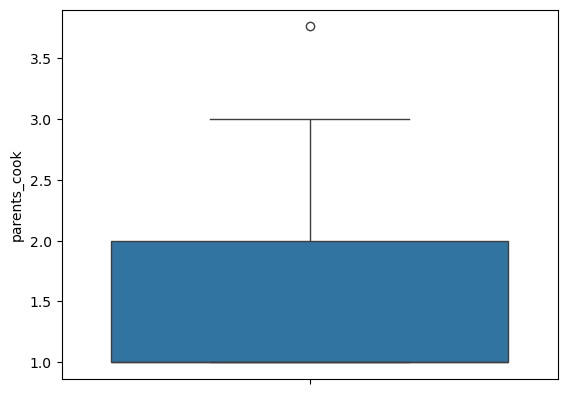

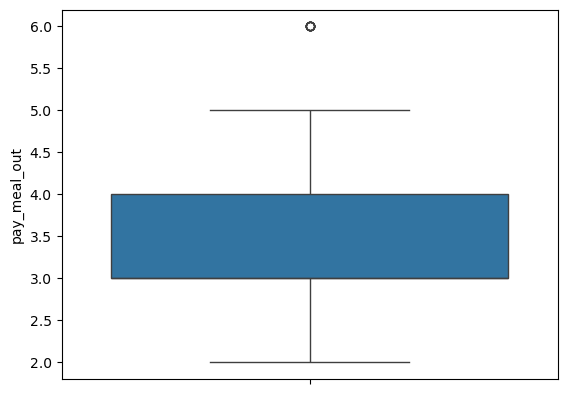

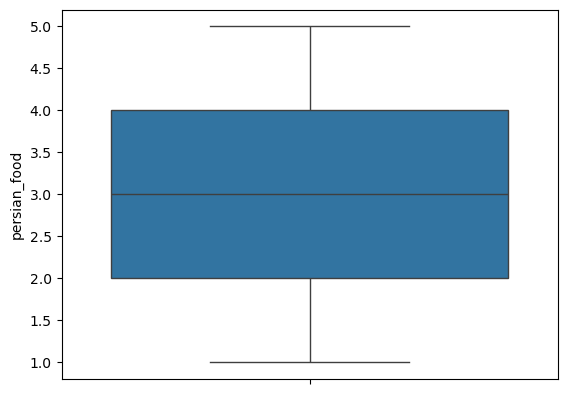

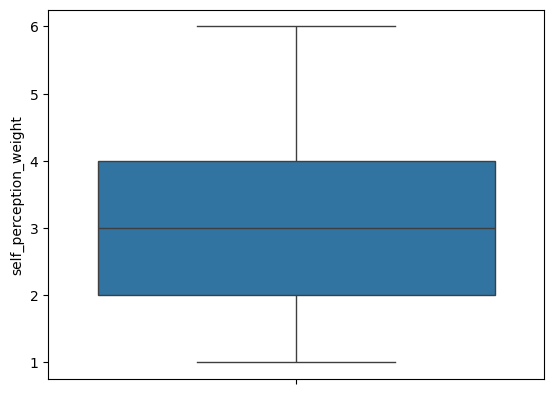

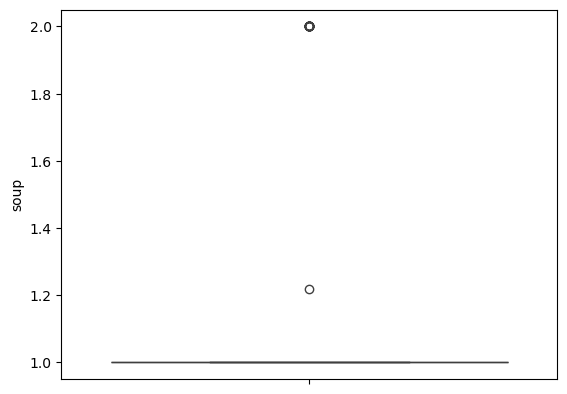

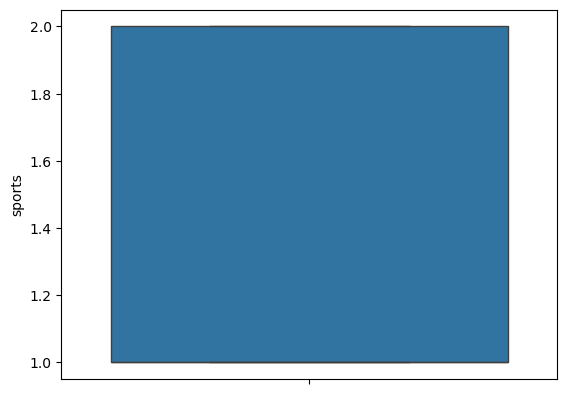

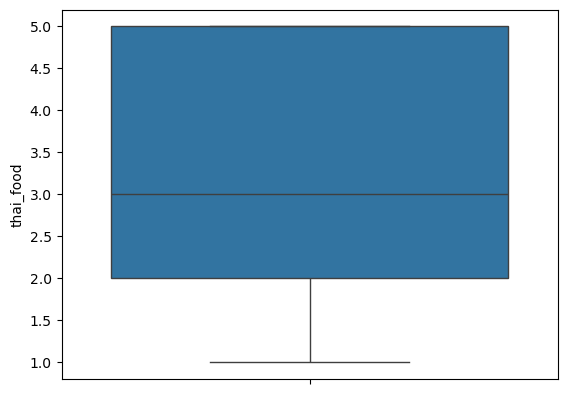

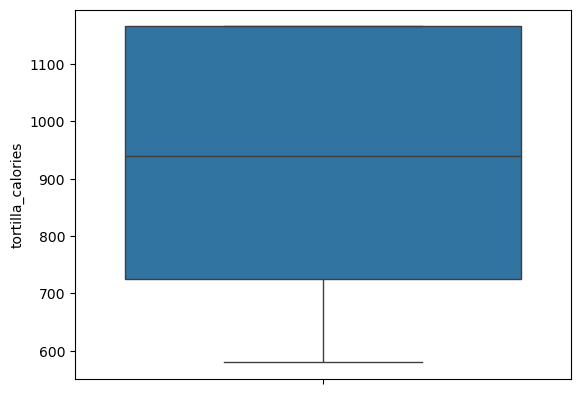

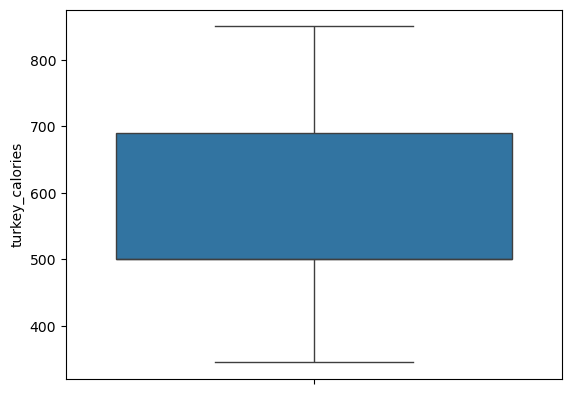

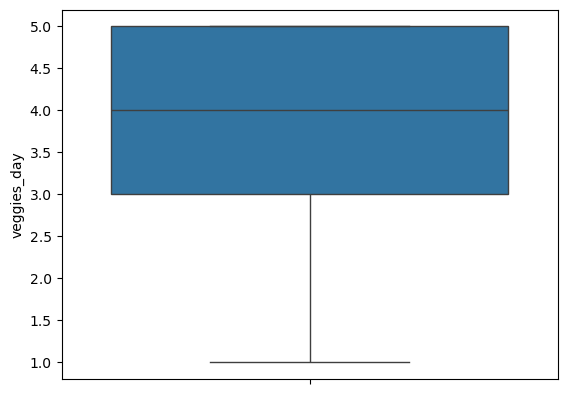

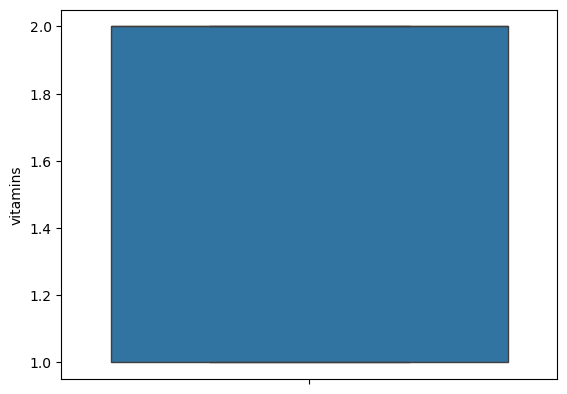

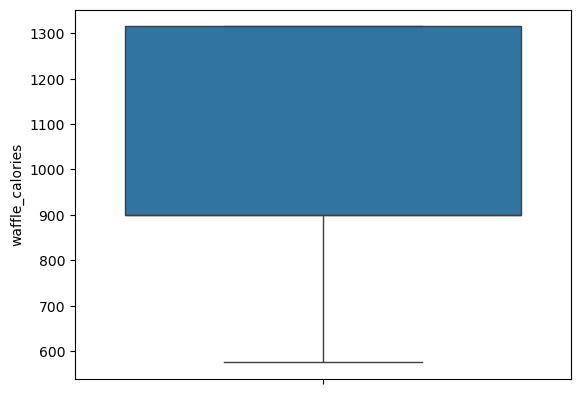

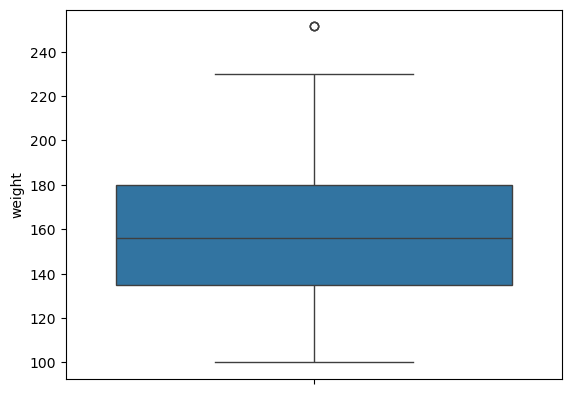

In [698]:
for i in clean_df_fdc.columns:
    sns.boxplot(clean_df_fdc[i])
    plt.show()

In [699]:
len(df_fdc)

125